<a href="https://colab.research.google.com/github/lidiapsp/Developing-Fraud-Detection-Model/blob/main/fraud_model_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transaction Dataset Overview

This dataset contains synthetic transaction data designed to help build and evaluate fraud detection models. The data represents realistic financial transactions, capturing important details about users, their transactions, and various risk factors. It's perfect for training machine learning models, especially for binary classification tasks like identifying fraudulent transactions.

The dataset has a mix of numerical, categorical, and temporal data, making it ideal for testing various models, including decision trees, gradient boosting machines like XGBoost, and other machine learning algorithms.

Key features of the dataset include transaction amounts, user details, transaction types, and fraud labels, which can be used to develop fraud detection systems, analyze transaction patterns, and detect potential anomalies in financial transactions.



---


**Columns in the Dataset:**


| **Column Name**                 | **Description**                                                                 |
|-------------------------------|---------------------------------------------------------------------------------|
| `Transaction_ID`              | Unique identifier for each transaction.                                        |
| `User_ID`                     | Unique identifier for the user.                                                |
| `Transaction_Amount`          | Amount of money involved in the transaction.                                   |
| `Transaction_Type`            | Type of transaction (e.g., Online, In-Store, ATM).                             |
| `Timestamp`                   | Date and time of the transaction.                                              |
| `Account_Balance`             | User's account balance before the transaction.                                 |
| `Device_Type`                 | Type of device used for the transaction (e.g., Mobile, Desktop).               |
| `Location`                    | Geographical location of the transaction.                                      |
| `Merchant_Category`          | Type of merchant (e.g., Retail, Food, Travel).                                 |
| `IP_Address_Flag`            | Indicates if the IP address was flagged as suspicious (0 or 1).                |
| `Previous_Fraudulent_Activity` | Number of previous fraudulent activities by the user.                         |
| `Daily_Transaction_Count`     | Number of transactions made by the user that day.                              |
| `Avg_Transaction_Amount_7d`   | User's average transaction amount over the past 7 days.                        |
| `Failed_Transaction_Count_7d` | Number of failed transactions in the last 7 days.                              |
| `Card_Type`                   | Type of payment card used (e.g., Credit, Debit, Prepaid).                      |
| `Card_Age`                    | Age of the card in months.                                                     |
| `Transaction_Distance`        | Distance between the user's usual location and transaction location.          |
| `Authentication_Method`       | Method used by the user to authenticate (e.g., PIN, Biometric).               |
| `Risk_Score`                  | Fraud risk score calculated for the transaction.                               |
| `Is_Weekend`                  | Indicates whether the transaction occurred on a weekend (0 or 1).              |
| `Fraud_Label`                 | Target variable: 0 = Not Fraud, 1 = Fraud.                                     |

# Import Libary

In [ ]:
import pandas as pd #membaca data dari file CSV, manipulasi data dalam df
import numpy as np #operasi numerik
import matplotlib.pyplot as plt #membuat plot
import seaborn as sns #membuat plot yang lebih simple
import gdown #download data dari gdrive
import pickle # menyimpan data dalam format pickle
#for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split # split training and testing
# Handling imbalanced data
from imblearn.over_sampling import SMOTE # Oversampling
from imblearn.pipeline import Pipeline
#models
from sklearn.linear_model import LogisticRegression # train logistic regression model
from sklearn.ensemble import RandomForestClassifier # train randomforest yang merupakan algoritma ensemble learning yang menggabungkan beberapa decision tree untuk meningkatkan akurasi dan mengurangi overfitting
#models evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score,ConfusionMatrixDisplay # model performance report
import warnings
warnings.filterwarnings("ignore")
# Styling seaborn
sns.set_style('whitegrid')
import time # Import the time module
from scipy.stats import chi2_contingency

# Business Problem


masalah kita apasih?

bagaimana kita menganalisis transaksi data growbank untuk mengidentifikasi pattern dari sebuah fraud dan membangun sebuah model predictive yang memiliki akurasi diatas 88% di 3 bulan kedepan?

objectivenya apa?

untuk uncover trend dan karakteristik dari fradulent transaksi
mengidentifikasi key indicator dari fraud
membangun sebuah fraud detection model

# Importing dataset

In [ ]:
# Downloading data from drive
url = 'https://drive.google.com/file/d/1v6qCppaD1BO6SIz9Fw2ggC_jbAZqr723/view?usp=sharing'
output = 'fraud_data.csv' #nama untuk simpan data
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1v6qCppaD1BO6SIz9Fw2ggC_jbAZqr723
To: /content/fraud_data.csv
100%|██████████| 7.02M/7.02M [00:00<00:00, 139MB/s]


'fraud_data.csv'

In [ ]:
# Import it and store it as "df" variable
#pd.read_csv for reading the csv file
df = pd.read_csv('fraud_data.csv')

df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


setelah import dataset kita akan mengecek data dan membersihkannya jika diperlukan

# Data Cleaning

Kita akan melakukan data identifikasi dan pembersihan dengan melakukan pengecekan:
1. data type = d.info
2. nilai anomali = df.head
3. missing value = .isnull
4. duplicate = .duplicate

In [ ]:
#checking data type using info function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

In [ ]:
# Inspect missing values using .isnull function
df.isnull(). sum()

,0
Transaction_ID,0
User_ID,0
Transaction_Amount,0
Transaction_Type,0
Timestamp,0
Account_Balance,0
Device_Type,0
Location,0
Merchant_Category,0
IP_Address_Flag,0


In [ ]:
#check the duplicate pair by using parameter "keep=False" to keep the false (non duplicates row) and show the true (duplicates row)
df[df.duplicated(keep=False)]

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label


In [ ]:
# Checking the statistics of each numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_Amount,50000.0,99.411012,98.687292,0.0000,28.6775,69.66000,138.852500,1174.14
Account_Balance,50000.0,50294.065981,28760.458557,500.4800,25355.9950,50384.43000,75115.135000,99998.31
IP_Address_Flag,50000.0,0.050200,0.218360,0.0000,0.0000,0.00000,0.000000,1.00
Previous_Fraudulent_Activity,50000.0,0.098400,0.297858,0.0000,0.0000,0.00000,0.000000,1.00
Daily_Transaction_Count,50000.0,7.485240,4.039637,1.0000,4.0000,7.00000,11.000000,14.00
Avg_Transaction_Amount_7d,50000.0,255.271924,141.382279,10.0000,132.0875,256.08500,378.032500,500.00
Failed_Transaction_Count_7d,50000.0,2.003540,1.414273,0.0000,1.0000,2.00000,3.000000,4.00
Card_Age,50000.0,119.999940,68.985817,1.0000,60.0000,120.00000,180.000000,239.00
Transaction_Distance,50000.0,2499.164155,1442.013834,0.2500,1256.4975,2490.78500,3746.395000,4999.93
Risk_Score,50000.0,0.501556,0.287774,0.0001,0.2540,0.50225,0.749525,1.00


In [ ]:
# Checking the statistics of each categorical columns
df.describe(include='object').T

,count,unique,top,freq
Transaction_ID,50000,50000,TXN_5311,1
User_ID,50000,8963,USER_6599,16
Transaction_Type,50000,4,POS,12549
Timestamp,50000,47724,2023-06-04 06:35:00,4
Device_Type,50000,3,Tablet,16779
Location,50000,5,Tokyo,10208
Merchant_Category,50000,5,Clothing,10033
Card_Type,50000,4,Mastercard,12693
Authentication_Method,50000,4,Biometric,12591


In [ ]:
# Convert timestamp from objt to date time with format '%Y-%m-%d %H:%M:%S'
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
# Lower case our column names
df.columns = df.columns.str.lower()

In [ ]:
# Set 'Transaction_ID' as the index
df = df.set_index('transaction_id')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, TXN_33553 to TXN_15795
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       50000 non-null  object        
 1   transaction_amount            50000 non-null  float64       
 2   transaction_type              50000 non-null  object        
 3   timestamp                     50000 non-null  datetime64[ns]
 4   account_balance               50000 non-null  float64       
 5   device_type                   50000 non-null  object        
 6   location                      50000 non-null  object        
 7   merchant_category             50000 non-null  object        
 8   ip_address_flag               50000 non-null  int64         
 9   previous_fraudulent_activity  50000 non-null  int64         
 10  daily_transaction_count       50000 non-null  int64         
 11  avg_transaction_amoun

hasilnya, setelah dilakukan pengecekan didapatkan:
1. tidak ada data duplikasi
2. tidak ada missing value
3. tidak ada data yang anomali
4. kolom timestamp masih obj

proses data cleaning yang dilakukan:
1. convert kolom timestamp obj - datetime
2. lower case semua nama kolom
3. transaction_id menjadi index

selanjutkan kita melakukan eda untuk liat distribusi, trend dan karakteristik data

setelah import dataset kita akan mengecek data dan membersihkannya jika diperlukan

# EDA

Exploratory Data Analysis (EDA) adalah suatu proses uji investigasi awal yang bertujuan untuk mengidentifikasi pola, menemukan anomali, menguji hipotesis dan memeriksa asumsi.

Karena tujuan kita dalam eda ini spesifik untuk melihat pola trend pada data transaksi untuk meyingkap faktor faktor yang mempengaruhi target variable kita yaitu **fraud_label**

**sehingga plot dan chart yang akan dibuat akan dislicing berdasarkan fraud_label**

##Target check using barchart

karena tujuan kita adalah membuat model prediktif untuk mendeteksi fraud maka kita cek dulu apakah class kita seimbang, paling mudah pakai .value_counts(normalize=True) untuk kolom target (lalu bisa plotkan di barchart).

[Text(0, 0, '0.67866'), Text(0, 0, '0.32134')]

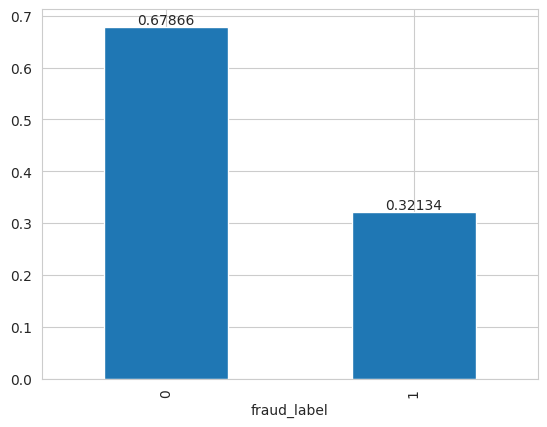

In [ ]:
#fraud vs non fraud distribution
values = df['fraud_label'].value_counts(normalize=True).plot(kind='bar')
plt.bar_label(values.containers[0])

data kita imbalance, data yang tergolong fraud 32%, maka nanti akan kita atasi dengan class_weight = 'balanced'

## Fraud vs Non-Fraud Transactions

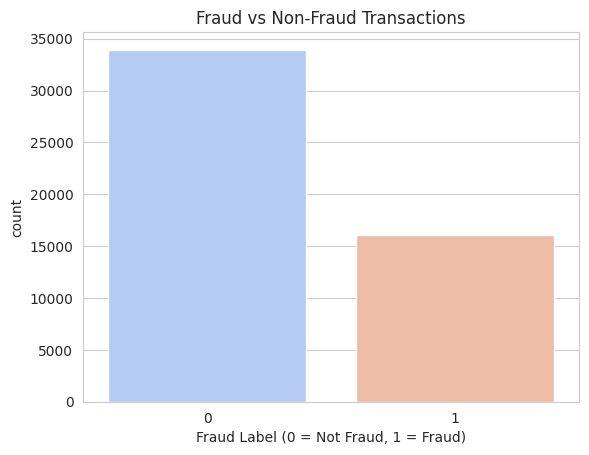

In [ ]:
# Fraud vs Non-Fraud Transactions
sns.countplot(x=df['fraud_label'], palette='coolwarm')
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Fraud Label (0 = Not Fraud, 1 = Fraud)")
plt.show()

In [ ]:
#group by fraud_label  and agg count
df.groupby('fraud_label').size()

,0
fraud_label,
0,33933
1,16067


jumlah transaksi fraud cukup banyak hampir 1/2 dari transaksi non fraud

## Transaction amount by fraud_label



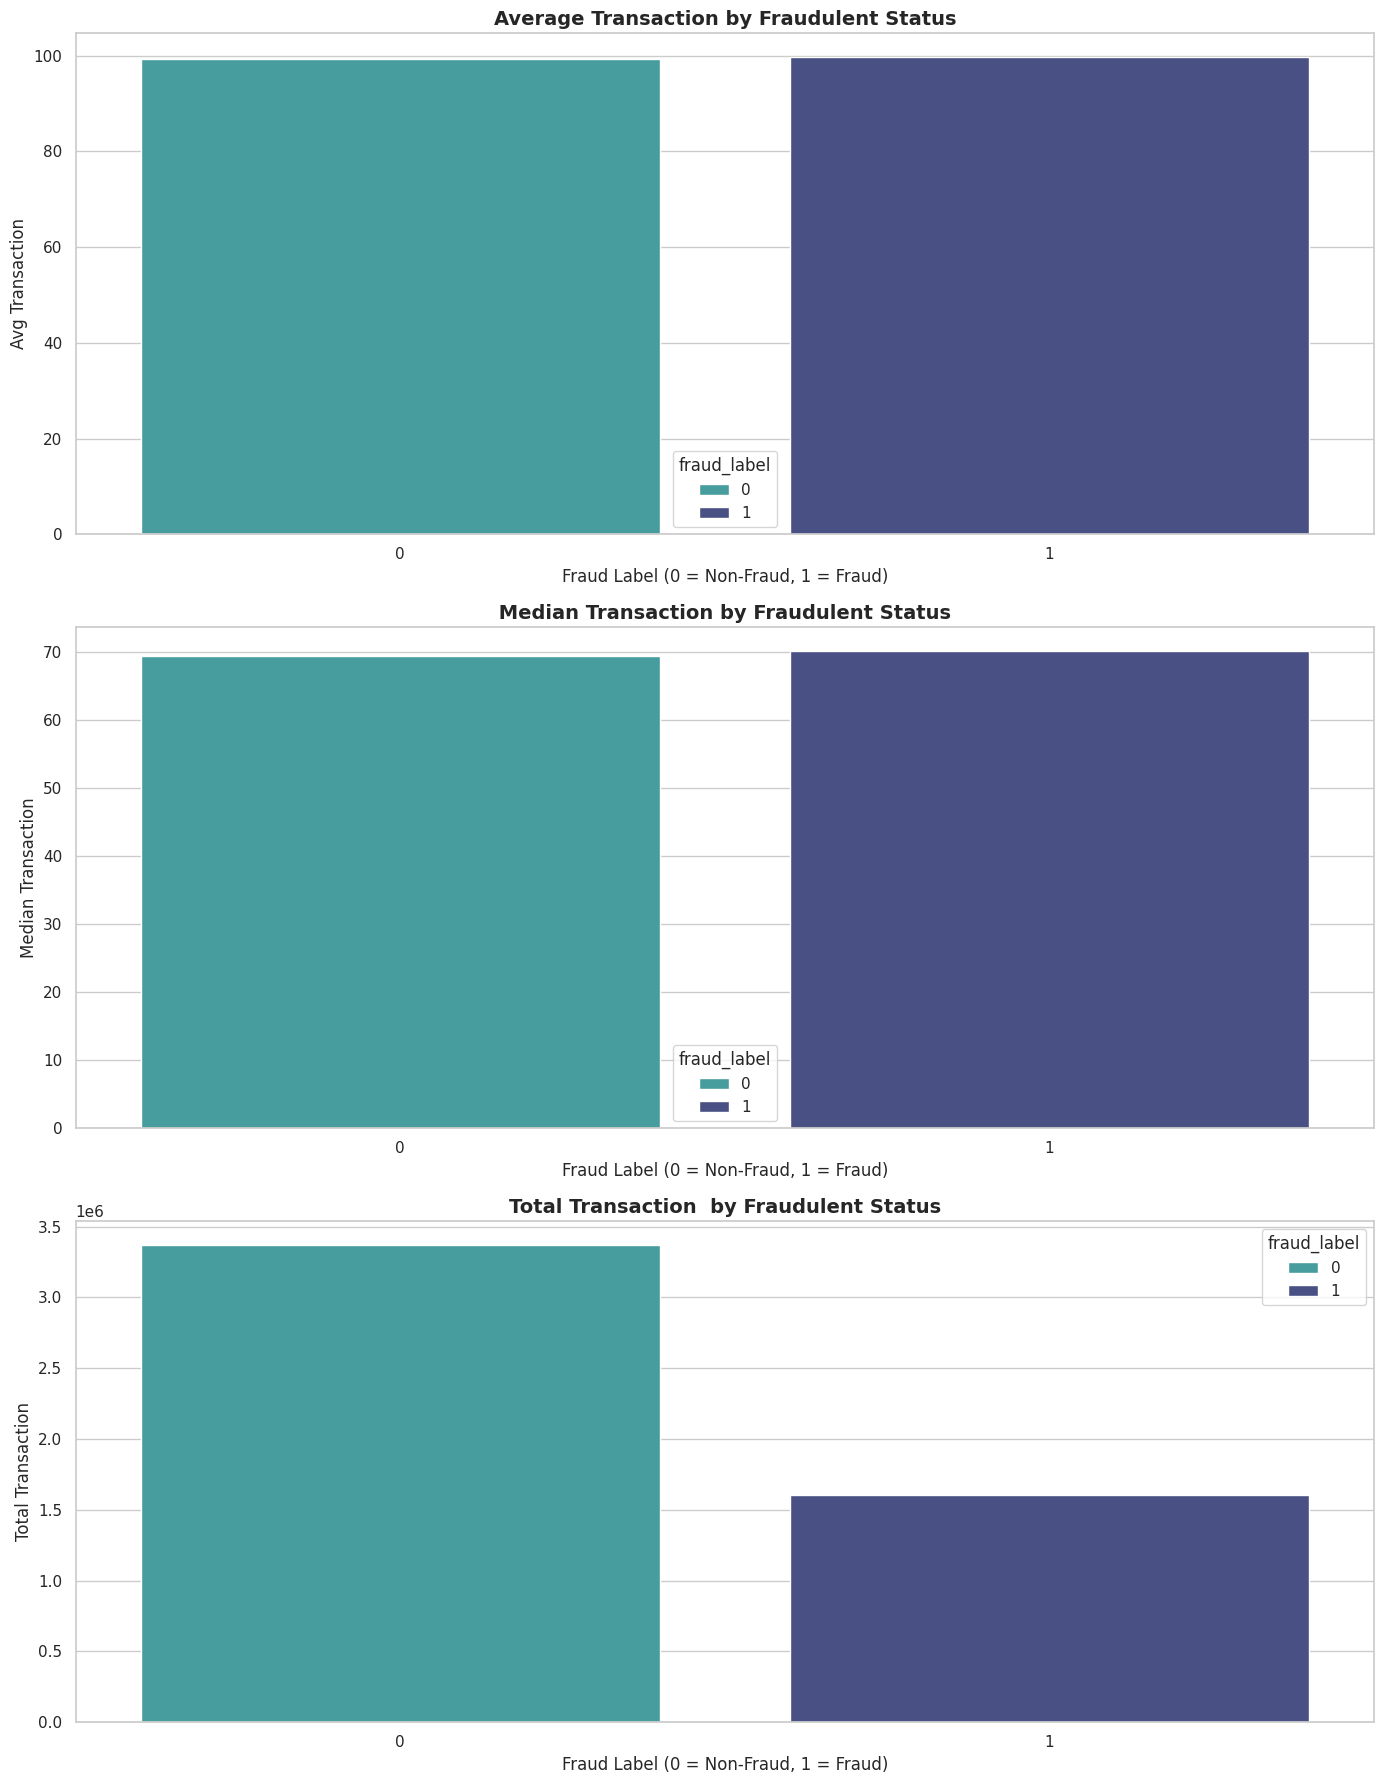

In [ ]:
# Define the columns to plot and their corresponding titles
columns = ['avg_transaction', 'median_transaction', 'total_transaction']
titles = ['Average Transaction by Fraudulent Status', ' Median Transaction by Fraudulent Status ', 'Total Transaction  by Fraudulent Status']


# Create subplots: 3 rows, 1 column
fig, axes = plt.subplots(3, 1, figsize=(14, 18), tight_layout=True)

# Group by fraud_label and aggregate transaction-amount
# This needs to be defined before the loop
transaction_amount_behaviour = df.groupby('fraud_label')['transaction_amount'].agg(
    avg_transaction='mean',
    median_transaction='median',
    total_transaction='sum'
)


# Iterate through the subplots and create the plots
for i, col in enumerate(columns):
    ax = axes[i]  # Get the current subplot axis
    # Added palette='Spectral' to the barplot call
    # Assign 'transaction_type' to the hue parameter
    sns.barplot(x=transaction_amount_behaviour.index, y=transaction_amount_behaviour[col], ax=ax, palette='mako_r', hue=transaction_amount_behaviour.index)  # Create the bar plot with Spectral reverse palette
    ax.set_title(titles[i], fontsize=14, fontweight='bold')  # Set the title
    ax.set_xlabel('Fraud Label (0 = Non-Fraud, 1 = Fraud)', fontsize=12)  # Set the x-axis label
    ax.set_ylabel(col.replace('_', ' ').title(), fontsize=12)  # Set the y-axis label
    # annotate_bars(ax)  # Annotate the bars # Commented out as this function is not provided

plt.show()

In [ ]:
# Group by fraud_label and aggregate transaction-amount
transaction_amount_behaviour = df.groupby('fraud_label')['transaction_amount'].agg(
    avg_transaction='mean',
    median_transaction='median',
    total_transaction='sum'
)
transaction_amount_behaviour

,avg_transaction,median_transaction,total_transaction
fraud_label,,,
0,99.281907,69.40,3368932.96
1,99.683678,70.12,1601617.65


tidak ada perbedaan signifikan pada rata rata dan median antara transaksi fraud dan non fraud, perbedaan mediannya cuma 0.72

## Fraud Count by Merchant Category

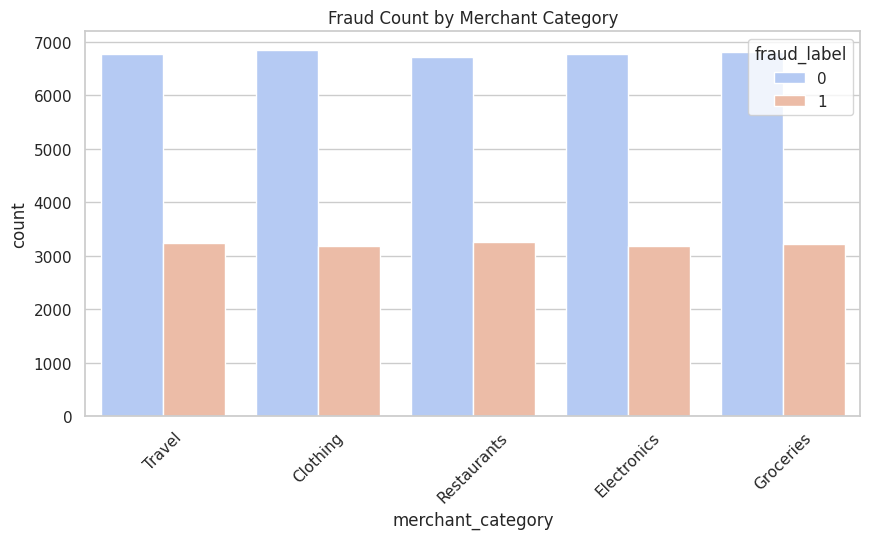

In [ ]:
#group by fraud label and merchant category and agg count
plt.figure(figsize=(10,5))
sns.countplot(x='merchant_category', hue='fraud_label', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Fraud Count by Merchant Category")
plt.show()

In [ ]:
# Group by 'fraud_label' , 'merchant_category' and agg count
df.groupby(['fraud_label', 'merchant_category']).size()  # Use .size() to count rows

fraud_label  merchant_category
0            Clothing             6852
             Electronics          6778
             Groceries            6802
             Restaurants          6721
             Travel               6780
1            Clothing             3181
             Electronics          3179
             Groceries            3217
             Restaurants          3255
             Travel               3235
dtype: int64

tidak ada perbedaan jumlah yang signifikan antar transaksi fraud yang terjadi di merchant 1 dengan lainnya

tetapi, merchant yang paling banyak transaksi fraud: restaurant, travel

## Fraud Transactions on Weekends vs Weekdays

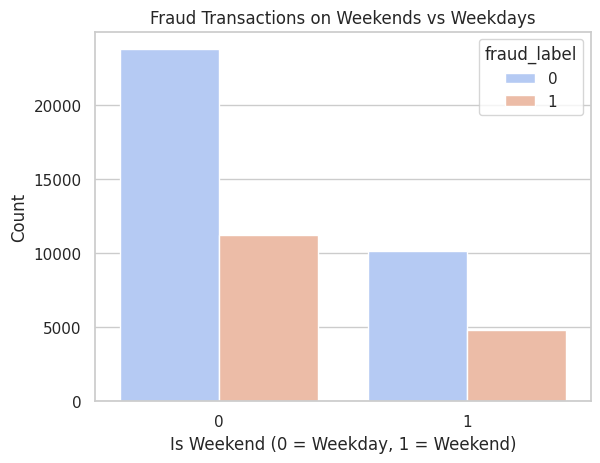

In [ ]:
#group by fraud label, is_weekend and agg count
sns.countplot(x=df['is_weekend'], hue=df['fraud_label'], palette='coolwarm')
plt.title("Fraud Transactions on Weekends vs Weekdays")
plt.xlabel("Is Weekend (0 = Weekday, 1 = Weekend)")
plt.ylabel("Count")
plt.show()

In [ ]:
#group by fraud_label, is weeken dan agg count
df.groupby(['fraud_label','is_weekend']).size()

fraud_label  is_weekend
0            0             23766
             1             10167
1            0             11252
             1              4815
dtype: int64

secara keseluruhan transaksi lebih banyak terjadi di weekday, sehingga jumlah transaksi fraud di weekend juga lebih sedikit dibandingkan di weekday

## Fraud Count by City

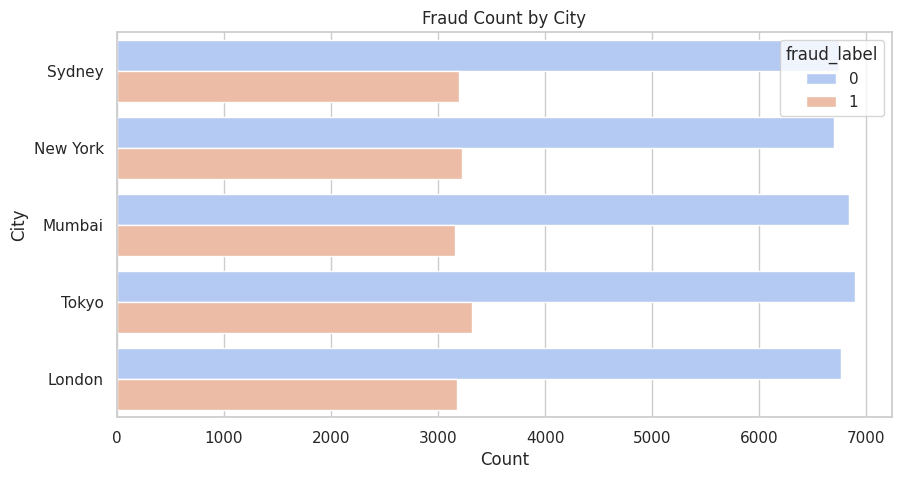

In [ ]:
#group by fraud label, location and agg count
plt.figure(figsize=(10,5))
sns.countplot(y=df['location'], hue=df['fraud_label'], palette='coolwarm')
plt.title("Fraud Count by City")
plt.xlabel("Count")
plt.ylabel("City")
plt.show()

In [ ]:
#group by fraud label, location and agg count
df.groupby(['fraud_label','location']).size()

fraud_label  location
0            London      6764
             Mumbai      6838
             New York    6694
             Sydney      6744
             Tokyo       6893
1            London      3181
             Mumbai      3156
             New York    3221
             Sydney      3194
             Tokyo       3315
dtype: int64

tidak ada perbedaan signifikan jumlah transaksi fraud antar kota 1 dengan lainnya.

tetapi, jika dilihat berdasarkan jumlah, kota yang paling banyak terjadi fraud; tokyo, new york

## Avg Transaction distance by fraud label

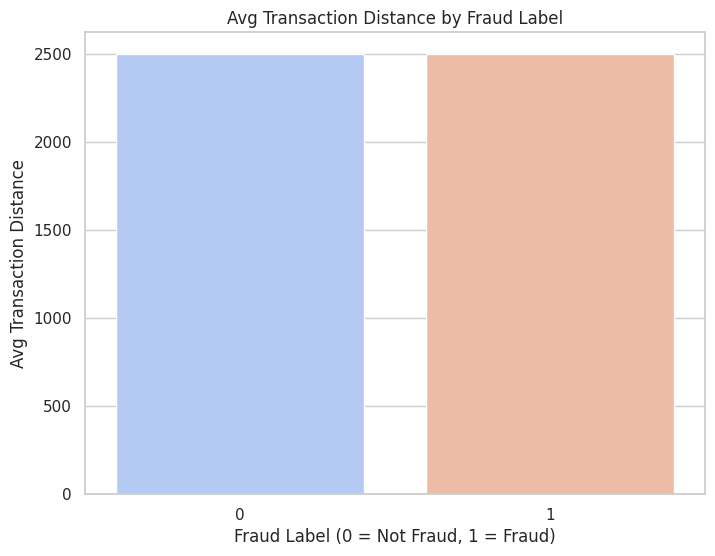

In [ ]:
#group by fraud label and agg avg transaction distance
# Calculate the average transaction distance for each fraud label
avg_distance_by_fraud = df.groupby('fraud_label')['transaction_distance'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='fraud_label', y='transaction_distance', data=avg_distance_by_fraud, palette='coolwarm')
plt.title("Avg Transaction Distance by Fraud Label")
plt.xlabel("Fraud Label (0 = Not Fraud, 1 = Fraud)")
plt.ylabel("Avg Transaction Distance")
plt.show()

In [ ]:
# Group by fraud_label and aggregate transaction_distance
df.groupby('fraud_label')['transaction_distance'].agg(
    avg_transaction_distance='mean',
    median_transaction_distance='median')


,avg_transaction_distance,median_transaction_distance
fraud_label,,
0,2499.278762,2487.68
1,2498.922109,2496.66


tidak ada perbedaan signifikan jarak antara transaksi fraud dan non fraud artinya jauh dekat jaraknya tidak memberikan pola tertentu

##Fraud Count by Card Type

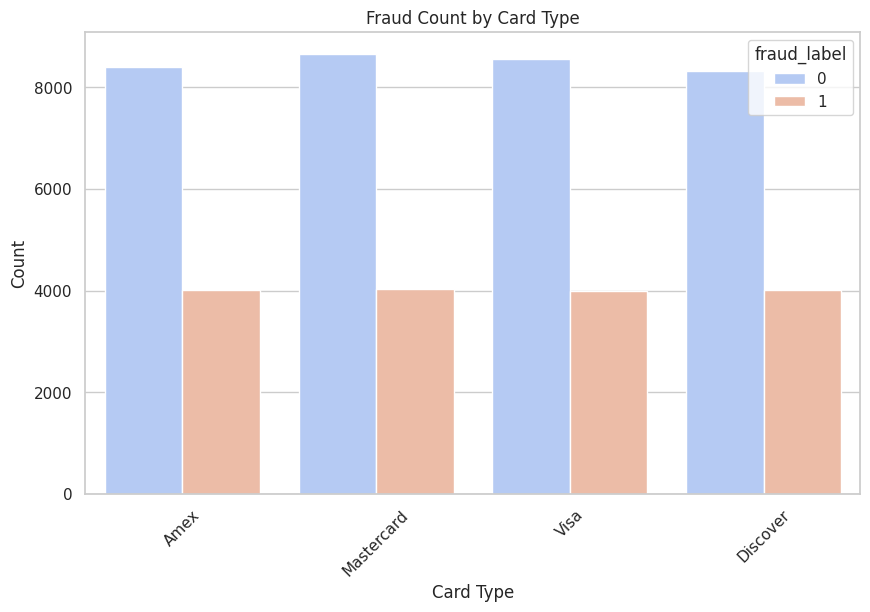

In [ ]:
# group by fraud label, Card Type and agg count
plt.figure(figsize=(10, 6))
sns.countplot(x='card_type', hue='fraud_label', data=df, palette='coolwarm')
plt.title('Fraud Count by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# group by fraud label, Card Type and agg count
df.groupby(['fraud_label','card_type']).size()

fraud_label  card_type 
0            Amex          8398
             Discover      8322
             Mastercard    8655
             Visa          8558
1            Amex          4021
             Discover      4006
             Mastercard    4038
             Visa          4002
dtype: int64

tidak ada perbedaan signifikan antara jumlah transaksi fraud yang dilakukan menggunakan kartu 1 dengan lainnya

tetapi jika dilihat dari jumlah yang paling banyak terjadi fraud: master card, amex

## Fraud Count by Transaction Type

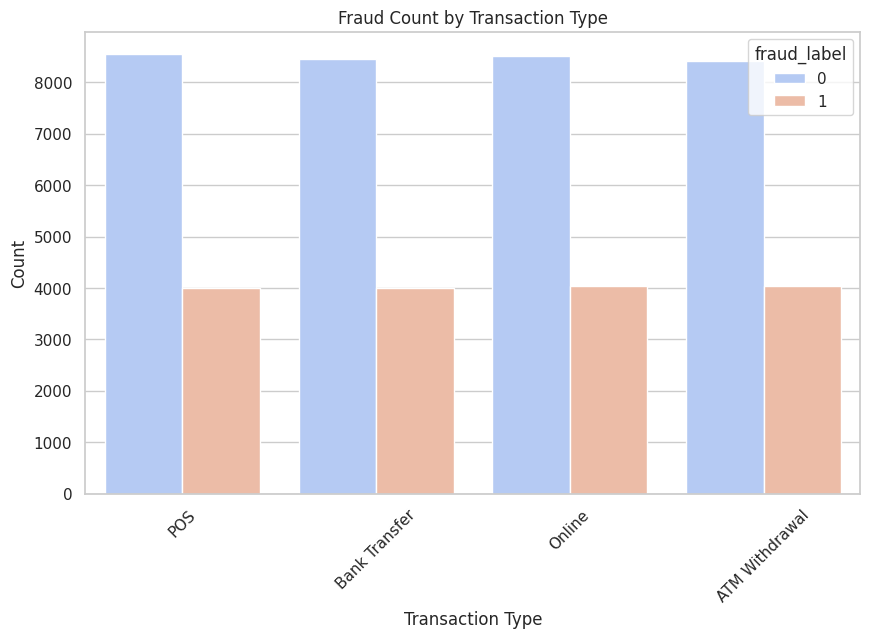

In [ ]:
# group by fraud label, transaction Type and agg count
plt.figure(figsize=(10, 6))
sns.countplot(x='transaction_type', hue='fraud_label', data=df, palette='coolwarm')
plt.title('Fraud Count by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# group by fraud label, transaction Type and agg count
df.groupby(['fraud_label','transaction_type']).size()

fraud_label  transaction_type
0            ATM Withdrawal      8407
             Bank Transfer       8457
             Online              8515
             POS                 8554
1            ATM Withdrawal      4046
             Bank Transfer       3995
             Online              4031
             POS                 3995
dtype: int64

tidak ada perbedaan signifikan antara jumlah transaksi fraud yang dilakukan menggunakan jenis transaksi 1 dengan lainnya

tetapi jika dilihat dari jumlah yang paling banyak terjadi fraud: atm withdrawal, online

## Fraud Count by Device Type

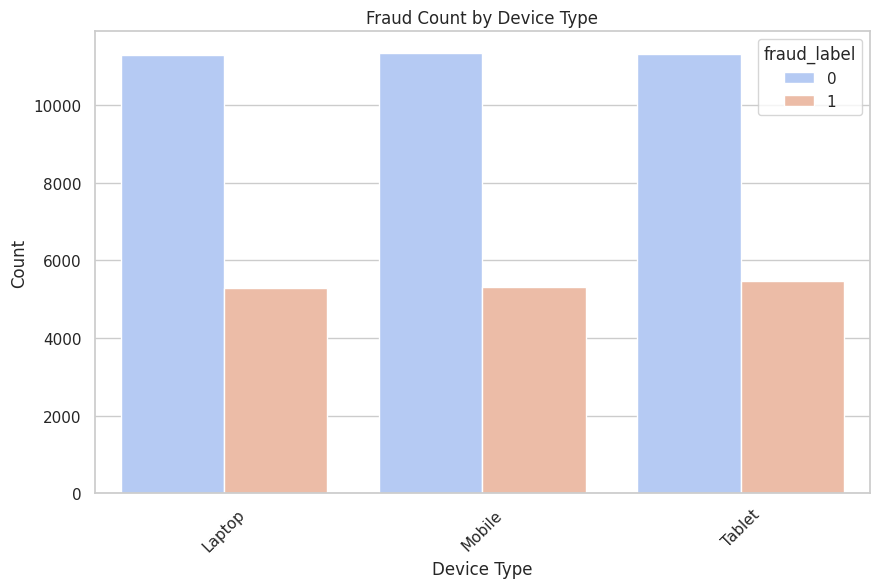

In [ ]:
# group by fraud label, device Type and agg count
plt.figure(figsize=(10, 6))
sns.countplot(x='device_type', hue='fraud_label', data=df, palette='coolwarm')
plt.title('Fraud Count by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# group by fraud label, device Type and agg count
df.groupby(['fraud_label','device_type']).size()

fraud_label  device_type
0            Laptop         11283
             Mobile         11335
             Tablet         11315
1            Laptop          5298
             Mobile          5305
             Tablet          5464
dtype: int64

tidak ada perbedaan signifikan antara jumlah transaksi fraud yang dilakukan menggunakan perangkat 1 dengan lainnya

tetapi jika dilihat dari jumlah yang paling banyak terjadi fraud: tablet

## Fraud Count by Authentication Method

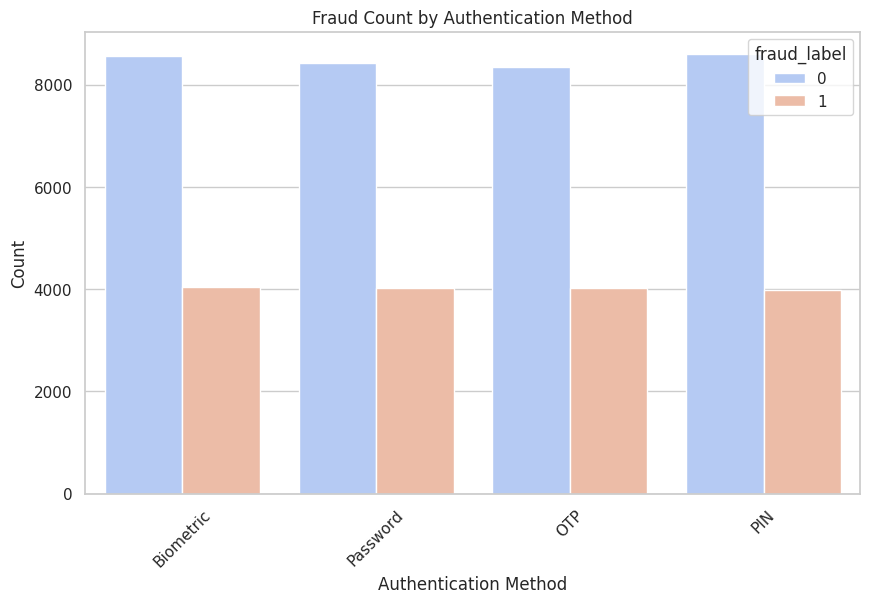

In [ ]:
# group by fraud label, authentication method and agg count
plt.figure(figsize=(10, 6))
sns.countplot(x='authentication_method', hue='fraud_label', data=df, palette='coolwarm')
plt.title('Fraud Count by Authentication Method')
plt.xlabel('Authentication Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# group by fraud label, authentication method and agg count
df.groupby(['fraud_label','authentication_method']).size()

fraud_label  authentication_method
0            Biometric                8553
             OTP                      8345
             PIN                      8608
             Password                 8427
1            Biometric                4038
             OTP                      4021
             PIN                      3978
             Password                 4030
dtype: int64

tidak ada perbedaan signifikan antara jumlah transaksi fraud yang dilakukan menggunakan perangkat 1 dengan lainnya

tetapi jika dilihat dari jumlah yang paling banyak terjadi fraud: biometric

## Flagged vs Non-Flagged IP Addresses by Fraud Status

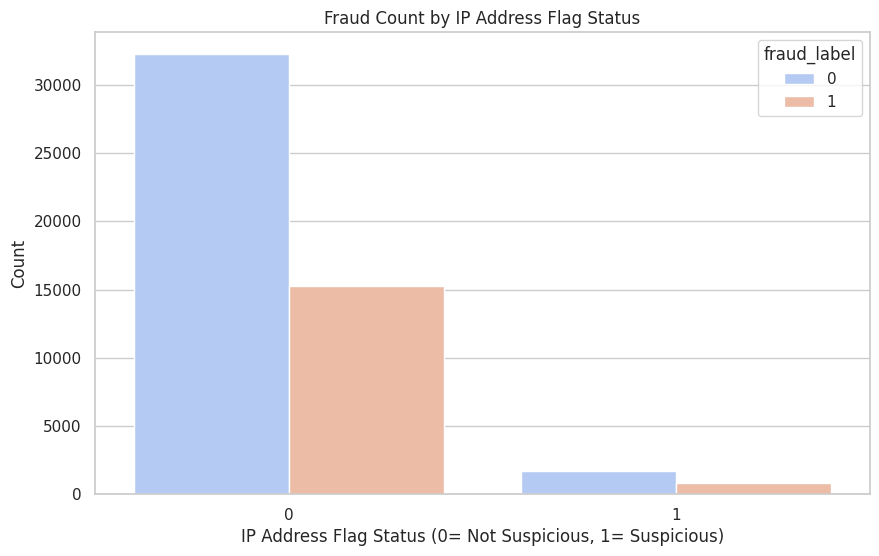

In [ ]:
# group by fraud label, ip address and agg count
plt.figure(figsize=(10, 6))
sns.countplot(x='ip_address_flag', hue='fraud_label', data=df, palette='coolwarm')
plt.title('Fraud Count by IP Address Flag Status')
plt.xlabel('IP Address Flag Status (0= Not Suspicious, 1= Suspicious)')
plt.ylabel('Count')
plt.show()


In [ ]:
# group by fraud label, ip address and agg count
df.groupby(['fraud_label', 'ip_address_flag']).size()

fraud_label  ip_address_flag
0            0                  32245
             1                   1688
1            0                  15245
             1                    822
dtype: int64

ip address yang sudah di flag bisa saja bukan merupakan trasaksi fraud sementara transasaksi fraud juga banyak berasal drai ip adress yang tidak di flag

## Previous Fraudulent Activities by Fraud Status

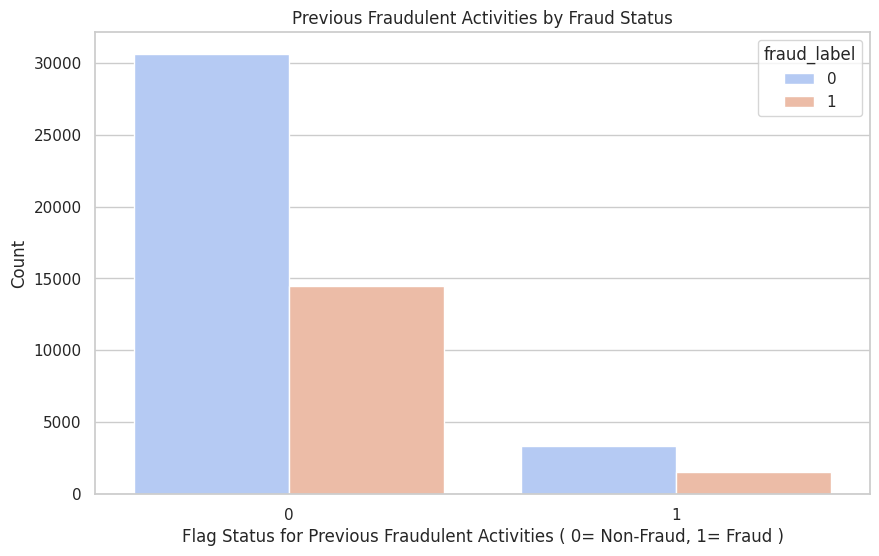

In [ ]:
# group by fraud label, previous fraudulent act and agg count
plt.figure(figsize=(10, 6))
sns.countplot(x='previous_fraudulent_activity', hue='fraud_label', data=df, palette='coolwarm')
plt.title('Previous Fraudulent Activities by Fraud Status')
plt.xlabel('Flag Status for Previous Fraudulent Activities ( 0= Non-Fraud, 1= Fraud )')
plt.ylabel('Count')
plt.show()


In [ ]:
# group by fraud label, previous fraudulent act and agg count
df.groupby(['fraud_label', 'previous_fraudulent_activity']).size()

fraud_label  previous_fraudulent_activity
0            0                               30589
             1                                3344
1            0                               14491
             1                                1576
dtype: int64

transaksi yang sudah di flag karena sebelumnya telah melakukan fraudulent activities bisa saja bukan merupakan trasaksi fraud sementara transasaksi fraud juga banyak berasal dari transaksi yg tidak melakukan fraudulent activities sebelumnya

## Distribution of Risk Score by Fraud Status

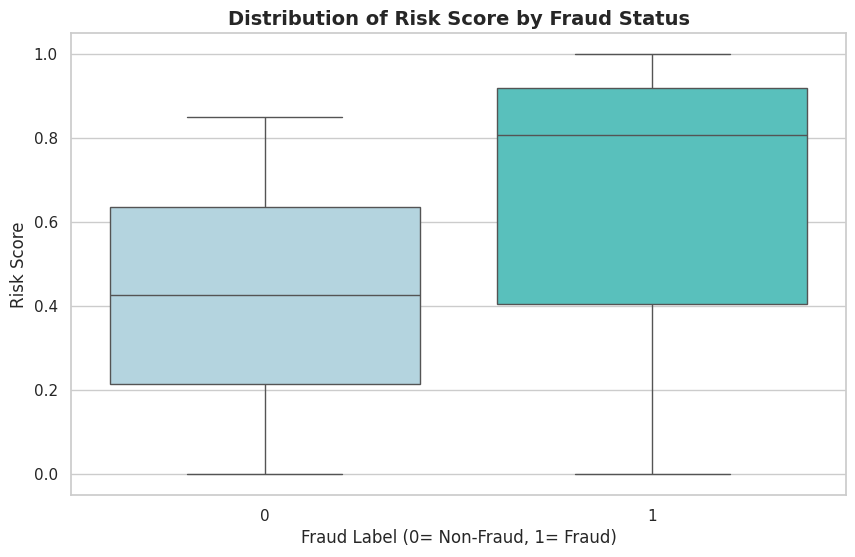

In [ ]:
#boxplot risk score based on fraud label
plt.figure(figsize=(10, 6))
#create box plot
sns.boxplot(x='fraud_label', y='risk_score', data=df, showfliers=True, palette={'0': 'lightblue', '1': 'mediumturquoise'})
plt.title('Distribution of Risk Score by Fraud Status', fontsize=14, fontweight='bold')
plt.xlabel('Fraud Label (0= Non-Fraud, 1= Fraud)')
plt.ylabel('Risk Score')
plt.show()

median risk score pada fraudulent transaksi lebih tinggi dibanding non fraus

## Avg Failed Transaction 7d by Fraud Label

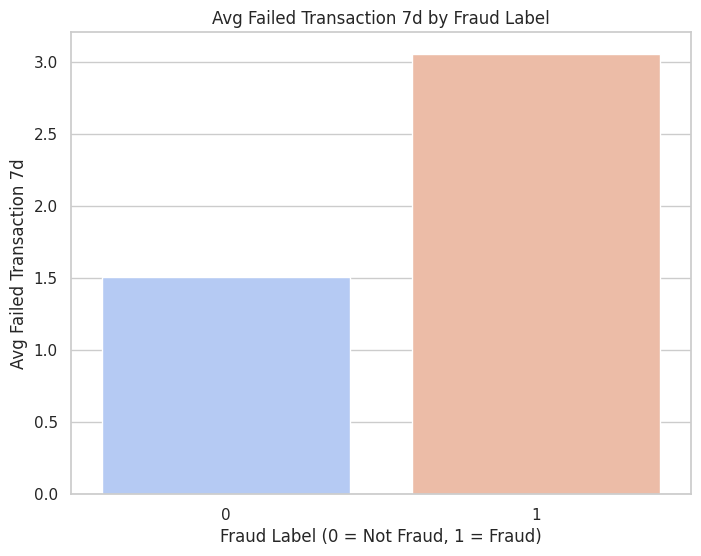

In [ ]:
#group by fraud label and agg avg failed transaction count in 7d
# Calculate the average failed_transaction_7d for each fraud label
avg_failed_transaction_7d_by_fraud = df.groupby('fraud_label')['failed_transaction_count_7d'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='fraud_label', y='failed_transaction_count_7d', data=avg_failed_transaction_7d_by_fraud, palette='coolwarm')
plt.title("Avg Failed Transaction 7d by Fraud Label")
plt.xlabel("Fraud Label (0 = Not Fraud, 1 = Fraud)")
plt.ylabel("Avg Failed Transaction 7d")
plt.show()

In [ ]:
#group by fraud label and agg avg failed transaction count in 7d
df.groupby('fraud_label')['failed_transaction_count_7d'].agg(
    avg_failed_transaction_7d='mean').round(0) # Round to 0 decimal places

,avg_failed_transaction_7d
fraud_label,
0,2.0
1,3.0


rata rata jumlah transaksi gagal pada fraudulent transaction lebih tinggi dibanding non fraud

##Card Age by Fraud Status

In [ ]:
#binning card age
binned_card_age = pd.cut(df['card_age'], bins=np.linspace(1, 239, 7).astype(int), labels=[1, 2, 3, 4, 5, 6], include_lowest=True)
df.groupby(['fraud_label', binned_card_age]).size().reset_index(name='number of transactions')

,fraud_label,card_age,number of transactions
0,0,1,5634
1,0,2,5724
2,0,3,5643
3,0,4,5496
4,0,5,5730
5,0,6,5706
6,1,1,2732
7,1,2,2675
8,1,3,2700
9,1,4,2626


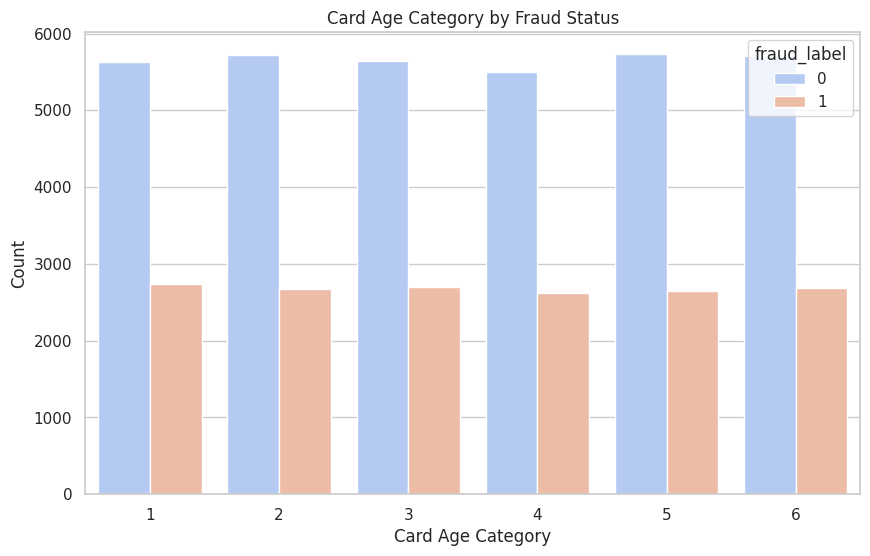

In [ ]:
#group by fraud label, card age category and agg count
plt.figure(figsize=(10, 6))
sns.countplot(x=binned_card_age, hue='fraud_label', data=df, palette='coolwarm')
plt.title('Card Age Category by Fraud Status')
plt.xlabel('Card Age Category')
plt.ylabel('Count')
plt.show()

kartu dengan maturity < 3 tahun memiliki jumlah fraudulent transaksi terbanyak tp perbedaan antara card age bin lain tidak signifikan

## Correlation Between Variable

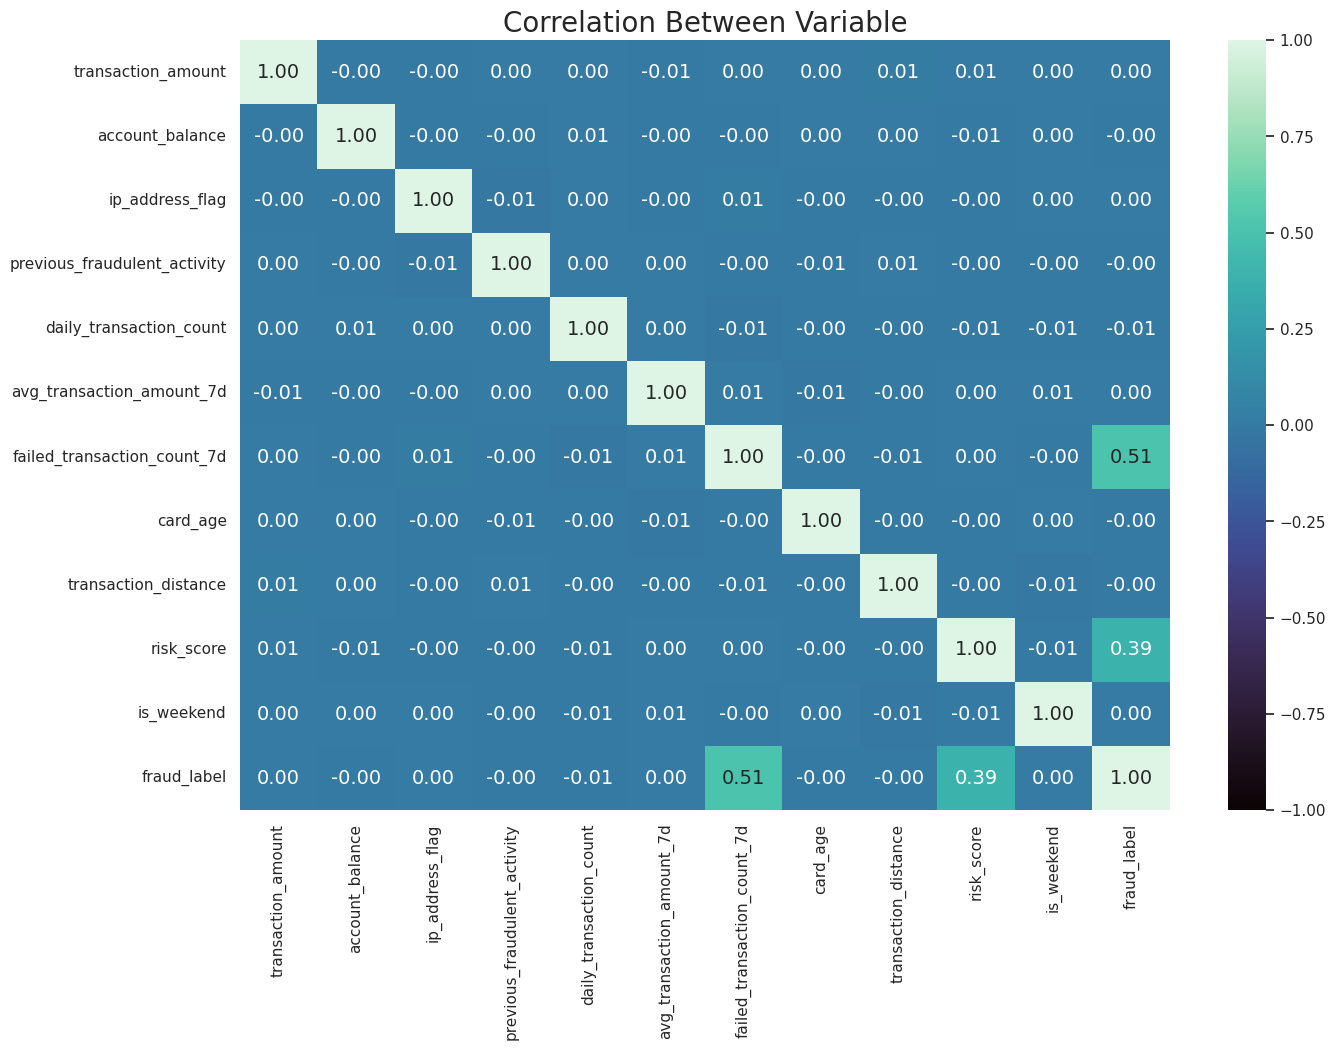

In [ ]:
#correlation check on numerical features
plt.subplots(figsize=(15,10))

plt.title('Correlation Between Variable', fontsize = 20)

# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)

sns.heatmap(
    numerical_df.corr(), #correlation data put in heatmap
    vmin=-1, #min value for heatmap color
    vmax=1, #max value for heatmap color
    cmap='mako', #color palette
    annot=True, #show label in the heatmap
    annot_kws={"fontsize":14}, #fontsize of label
    fmt=",.2f" #text format in label (,.2f = show 2 decimals)
);

ada 2 fitur yang berkorelasi tinggi dengan target yaitu failed transaction count 7d dan risk score, hal ini kedepannya bisa membuat model hanya mengandalkan kedua fitur itu untuk belajar sehingga menyebabkan indikasi overfitting

In [ ]:
#download to csv df

df.to_csv('fraud_data_clean_eda.csv', index=False)


## Uji Chi-Square for categorical features

In [ ]:
# pipiline chi-square test
def run_chi_square(df, feature, target='fraud_label'):
    table = pd.crosstab(df[feature], df[target])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"Feature: {feature}")
    print("Contingency Table:")
    print(table)
    print(f"Chi-Square Stat = {chi2:.4f}, p-value = {p:.4f}, DoF = {dof}")
    print("-" * 50)

# categorical feature list
categorical_columns = [
    'transaction_type',
    'device_type',
    'location',
    'merchant_category',
    'card_type',
    'authentication_method',
    'ip_address_flag',
    'is_weekend',
    'previous_fraudulent_activity'
]

# run the chi square test
for col in categorical_columns:
    run_chi_square(df, col)


Feature: transaction_type
Contingency Table:
fraud_label          0     1
transaction_type            
ATM Withdrawal    8407  4046
Bank Transfer     8457  3995
Online            8515  4031
POS               8554  3995
Chi-Square Stat = 1.2529, p-value = 0.7403, DoF = 3
--------------------------------------------------
Feature: device_type
Contingency Table:
fraud_label      0     1
device_type             
Laptop       11283  5298
Mobile       11335  5305
Tablet       11315  5464
Chi-Square Stat = 2.1656, p-value = 0.3386, DoF = 2
--------------------------------------------------
Feature: location
Contingency Table:
fraud_label     0     1
location               
London       6764  3181
Mumbai       6838  3156
New York     6694  3221
Sydney       6744  3194
Tokyo        6893  3315
Chi-Square Stat = 2.6185, p-value = 0.6235, DoF = 4
--------------------------------------------------
Feature: merchant_category
Contingency Table:
fraud_label           0     1
merchant_category         

tidak ada perbedaan antara seluruh fitur kategorikal pada fraud dan non fraud

# Feature Engineering



## Intial inspection

In [ ]:
df['user_id'].value_counts()

,count
user_id,
USER_6599,16
USER_9998,16
USER_3925,16
USER_3415,15
USER_5014,15
...,...
USER_4000,1
USER_1501,1
USER_5657,1


In [ ]:

# Display the columns for user_id 'USER_6599'

user_df = df[df['user_id'] == 'USER_6599']
user_df


,user_id,transaction_amount,transaction_type,timestamp,account_balance,device_type,location,merchant_category,ip_address_flag,previous_fraudulent_activity,daily_transaction_count,avg_transaction_amount_7d,failed_transaction_count_7d,card_type,card_age,transaction_distance,authentication_method,risk_score,is_weekend,fraud_label
transaction_id,,,,,,,,,,,,,,,,,,,,
TXN_47750,USER_6599,7.16,Online,2023-09-23 15:35:00,45415.16,Mobile,Mumbai,Restaurants,0,0,4,198.31,3,Amex,157,4803.67,Biometric,0.0421,0,0
TXN_49982,USER_6599,88.93,Bank Transfer,2023-11-01 04:21:00,96632.97,Laptop,Sydney,Travel,0,0,10,44.40,2,Discover,110,4248.12,PIN,0.1306,1,0
TXN_4645,USER_6599,52.01,ATM Withdrawal,2023-09-15 23:55:00,44046.31,Tablet,London,Groceries,0,0,11,395.52,1,Discover,184,4544.98,Biometric,0.4975,1,0
TXN_23534,USER_6599,181.75,Online,2023-01-23 08:20:00,97819.78,Mobile,Mumbai,Restaurants,0,0,12,138.11,2,Amex,60,401.01,OTP,0.9960,0,1
TXN_18160,USER_6599,93.85,Bank Transfer,2023-12-08 13:34:00,15055.57,Laptop,Sydney,Restaurants,0,0,8,245.06,2,Discover,205,2518.41,OTP,0.1569,0,0
TXN_5414,USER_6599,384.34,Bank Transfer,2023-07-27 03:33:00,55811.94,Tablet,Mumbai,Travel,0,0,13,338.42,2,Visa,218,2587.99,PIN,0.7837,1,0
TXN_45299,USER_6599,50.72,Bank Transfer,2023-01-18 07:43:00,68968.47,Laptop,New York,Clothing,0,0,7,424.84,3,Amex,55,2591.50,PIN,0.6365,0,0
TXN_18327,USER_6599,136.32,ATM Withdrawal,2023-03-11 09:40:00,96554.17,Mobile,Tokyo,Restaurants,0,0,11,488.11,3,Amex,221,2215.41,PIN,0.0229,0,0
TXN_37302,USER_6599,35.51,Online,2023-03-30 10:59:00,25727.61,Tablet,New York,Restaurants,0,0,14,159.75,0,Discover,92,2990.83,PIN,0.2211,1,0


In [ ]:
# Sort by the 'timestamp' column
sorted_user_df = user_df.sort_values(by='timestamp')

# Display the sorted DataFrame
sorted_user_df


,user_id,transaction_amount,transaction_type,timestamp,account_balance,device_type,location,merchant_category,ip_address_flag,previous_fraudulent_activity,daily_transaction_count,avg_transaction_amount_7d,failed_transaction_count_7d,card_type,card_age,transaction_distance,authentication_method,risk_score,is_weekend,fraud_label
transaction_id,,,,,,,,,,,,,,,,,,,,
TXN_27643,USER_6599,24.25,POS,2023-01-11 11:16:00,55599.90,Tablet,Mumbai,Groceries,0,1,11,311.34,3,Discover,158,2341.28,Biometric,0.5210,0,0
TXN_45299,USER_6599,50.72,Bank Transfer,2023-01-18 07:43:00,68968.47,Laptop,New York,Clothing,0,0,7,424.84,3,Amex,55,2591.50,PIN,0.6365,0,0
TXN_23534,USER_6599,181.75,Online,2023-01-23 08:20:00,97819.78,Mobile,Mumbai,Restaurants,0,0,12,138.11,2,Amex,60,401.01,OTP,0.9960,0,1
TXN_22740,USER_6599,358.75,Bank Transfer,2023-02-02 14:00:00,68645.88,Laptop,Mumbai,Clothing,0,0,3,393.49,2,Discover,40,1966.56,PIN,0.2397,0,0
TXN_40864,USER_6599,108.99,Online,2023-03-02 09:42:00,6270.15,Laptop,Tokyo,Electronics,0,0,5,369.91,3,Mastercard,50,4611.16,PIN,0.6379,1,0
TXN_18327,USER_6599,136.32,ATM Withdrawal,2023-03-11 09:40:00,96554.17,Mobile,Tokyo,Restaurants,0,0,11,488.11,3,Amex,221,2215.41,PIN,0.0229,0,0
TXN_37302,USER_6599,35.51,Online,2023-03-30 10:59:00,25727.61,Tablet,New York,Restaurants,0,0,14,159.75,0,Discover,92,2990.83,PIN,0.2211,1,0
TXN_7014,USER_6599,89.62,Online,2023-05-11 16:05:00,67028.21,Laptop,Sydney,Electronics,0,0,1,185.64,3,Visa,51,3963.96,Password,0.0689,0,0
TXN_5414,USER_6599,384.34,Bank Transfer,2023-07-27 03:33:00,55811.94,Tablet,Mumbai,Travel,0,0,13,338.42,2,Visa,218,2587.99,PIN,0.7837,1,0


In [ ]:
# Display rows where 'fraud_label' is equal to 1
fraud_transactions = sorted_user_df[sorted_user_df['fraud_label'] == 1]
fraud_transactions


,user_id,transaction_amount,transaction_type,timestamp,account_balance,device_type,location,merchant_category,ip_address_flag,previous_fraudulent_activity,daily_transaction_count,avg_transaction_amount_7d,failed_transaction_count_7d,card_type,card_age,transaction_distance,authentication_method,risk_score,is_weekend,fraud_label
transaction_id,,,,,,,,,,,,,,,,,,,,
TXN_23534,USER_6599,181.75,Online,2023-01-23 08:20:00,97819.78,Mobile,Mumbai,Restaurants,0,0,12,138.11,2,Amex,60,401.01,OTP,0.9960,0,1
TXN_45311,USER_6599,211.32,POS,2023-07-29 20:28:00,60128.57,Tablet,Tokyo,Restaurants,0,0,12,483.96,3,Amex,56,4797.03,Biometric,0.9071,0,1
TXN_27790,USER_6599,2.88,ATM Withdrawal,2023-10-17 02:36:00,48612.60,Laptop,London,Electronics,0,0,11,77.55,4,Amex,81,1952.43,Biometric,0.7023,0,1


In [ ]:
sorted_user_df.describe()

,transaction_amount,timestamp,account_balance,ip_address_flag,previous_fraudulent_activity,daily_transaction_count,avg_transaction_amount_7d,failed_transaction_count_7d,card_age,transaction_distance,risk_score,is_weekend,fraud_label
count,16.000000,16,16.000000,16.0,16.0000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000,16.000000
mean,120.821250,2023-06-13 07:29:48.750000128,58219.733125,0.0,0.0625,9.062500,277.584375,2.250000,109.68750,2962.300625,0.411781,0.375,0.187500
min,2.880000,2023-01-11 11:16:00,6270.150000,0.0,0.0000,1.000000,44.400000,0.000000,17.00000,401.010000,0.022900,0.000,0.000000
25%,46.917500,2023-02-23 10:46:30,45072.947500,0.0,0.0000,6.500000,179.167500,2.000000,54.00000,2153.197500,0.115175,0.000,0.000000
50%,91.735000,2023-06-18 21:49:00,57970.255000,0.0,0.0000,11.000000,278.200000,2.500000,86.50000,2589.745000,0.368600,0.000,0.000000
75%,147.677500,2023-09-29 12:20:15,71525.962500,0.0,0.0000,12.000000,393.997500,3.000000,164.50000,4322.335000,0.654000,1.000,0.000000
max,384.340000,2023-12-08 13:34:00,97819.780000,0.0,1.0000,14.000000,488.110000,4.000000,221.00000,4803.670000,0.996000,1.000,1.000000
std,113.822451,NaN,27503.080706,0.0,0.2500,3.923752,141.666909,1.125463,69.87295,1391.328867,0.336242,0.500,0.403113


In [ ]:
# Display the columns for user_id 'USER_9998'

user_df_2 = df[df['user_id'] == 'USER_9998']
user_df_2


,user_id,transaction_amount,transaction_type,timestamp,account_balance,device_type,location,merchant_category,ip_address_flag,previous_fraudulent_activity,daily_transaction_count,avg_transaction_amount_7d,failed_transaction_count_7d,card_type,card_age,transaction_distance,authentication_method,risk_score,is_weekend,fraud_label
transaction_id,,,,,,,,,,,,,,,,,,,,
TXN_11163,USER_9998,49.53,Bank Transfer,2023-11-04 04:01:00,81626.81,Tablet,New York,Electronics,0,0,12,220.06,1,Amex,34,4727.77,OTP,0.2499,0,0
TXN_24784,USER_9998,59.42,Bank Transfer,2023-04-14 15:55:00,94670.06,Laptop,New York,Electronics,0,0,11,213.91,3,Mastercard,61,3731.63,PIN,0.9084,1,1
TXN_46265,USER_9998,174.77,Bank Transfer,2023-02-11 03:44:00,99437.69,Mobile,Tokyo,Groceries,0,0,13,351.47,0,Mastercard,17,1546.91,Password,0.5168,1,0
TXN_36549,USER_9998,336.28,POS,2023-08-22 22:43:00,55490.35,Tablet,London,Electronics,0,1,9,346.64,0,Visa,41,3483.61,PIN,0.1581,1,0
TXN_12208,USER_9998,34.91,ATM Withdrawal,2023-03-19 11:40:00,84839.11,Laptop,Mumbai,Electronics,0,0,9,94.65,0,Visa,143,1955.45,PIN,0.4856,1,0
TXN_19051,USER_9998,95.52,Online,2023-08-19 21:40:00,18851.31,Tablet,Mumbai,Groceries,0,1,13,88.85,2,Mastercard,172,3494.61,Password,0.2441,0,0
TXN_17041,USER_9998,184.21,Online,2023-02-23 11:39:00,87760.42,Laptop,London,Clothing,0,0,1,93.51,2,Discover,46,2970.61,OTP,0.4725,0,0
TXN_48068,USER_9998,18.94,ATM Withdrawal,2023-03-10 09:34:00,8419.52,Laptop,London,Groceries,0,0,9,143.62,4,Visa,133,428.16,PIN,0.2565,1,1
TXN_9946,USER_9998,133.54,POS,2023-02-07 08:59:00,98634.84,Laptop,Sydney,Groceries,0,0,12,191.60,0,Discover,136,1017.45,PIN,0.9694,0,1


In [ ]:
# Sort by the 'timestamp' column
sorted_user_df_2 = user_df_2.sort_values(by='timestamp')

# Display the sorted DataFrame
sorted_user_df_2


,user_id,transaction_amount,transaction_type,timestamp,account_balance,device_type,location,merchant_category,ip_address_flag,previous_fraudulent_activity,daily_transaction_count,avg_transaction_amount_7d,failed_transaction_count_7d,card_type,card_age,transaction_distance,authentication_method,risk_score,is_weekend,fraud_label
transaction_id,,,,,,,,,,,,,,,,,,,,
TXN_30347,USER_9998,5.74,POS,2023-01-21 03:53:00,17164.18,Laptop,Sydney,Clothing,0,0,12,343.24,4,Visa,79,111.45,OTP,0.0001,1,1
TXN_9946,USER_9998,133.54,POS,2023-02-07 08:59:00,98634.84,Laptop,Sydney,Groceries,0,0,12,191.60,0,Discover,136,1017.45,PIN,0.9694,0,1
TXN_46265,USER_9998,174.77,Bank Transfer,2023-02-11 03:44:00,99437.69,Mobile,Tokyo,Groceries,0,0,13,351.47,0,Mastercard,17,1546.91,Password,0.5168,1,0
TXN_17041,USER_9998,184.21,Online,2023-02-23 11:39:00,87760.42,Laptop,London,Clothing,0,0,1,93.51,2,Discover,46,2970.61,OTP,0.4725,0,0
TXN_48068,USER_9998,18.94,ATM Withdrawal,2023-03-10 09:34:00,8419.52,Laptop,London,Groceries,0,0,9,143.62,4,Visa,133,428.16,PIN,0.2565,1,1
TXN_12208,USER_9998,34.91,ATM Withdrawal,2023-03-19 11:40:00,84839.11,Laptop,Mumbai,Electronics,0,0,9,94.65,0,Visa,143,1955.45,PIN,0.4856,1,0
TXN_24784,USER_9998,59.42,Bank Transfer,2023-04-14 15:55:00,94670.06,Laptop,New York,Electronics,0,0,11,213.91,3,Mastercard,61,3731.63,PIN,0.9084,1,1
TXN_6917,USER_9998,129.45,Bank Transfer,2023-06-04 14:59:00,74642.78,Tablet,Sydney,Electronics,0,0,11,144.45,1,Mastercard,103,2968.34,Biometric,0.7462,0,0
TXN_19051,USER_9998,95.52,Online,2023-08-19 21:40:00,18851.31,Tablet,Mumbai,Groceries,0,1,13,88.85,2,Mastercard,172,3494.61,Password,0.2441,0,0


In [ ]:
# Display rows where 'fraud_label' is equal to 1
fraud_transactions_2 = sorted_user_df_2[sorted_user_df_2['fraud_label'] == 1]
fraud_transactions_2


,user_id,transaction_amount,transaction_type,timestamp,account_balance,device_type,location,merchant_category,ip_address_flag,previous_fraudulent_activity,daily_transaction_count,avg_transaction_amount_7d,failed_transaction_count_7d,card_type,card_age,transaction_distance,authentication_method,risk_score,is_weekend,fraud_label
transaction_id,,,,,,,,,,,,,,,,,,,,
TXN_30347,USER_9998,5.74,POS,2023-01-21 03:53:00,17164.18,Laptop,Sydney,Clothing,0,0,12,343.24,4,Visa,79,111.45,OTP,0.0001,1,1
TXN_9946,USER_9998,133.54,POS,2023-02-07 08:59:00,98634.84,Laptop,Sydney,Groceries,0,0,12,191.60,0,Discover,136,1017.45,PIN,0.9694,0,1
TXN_48068,USER_9998,18.94,ATM Withdrawal,2023-03-10 09:34:00,8419.52,Laptop,London,Groceries,0,0,9,143.62,4,Visa,133,428.16,PIN,0.2565,1,1
TXN_24784,USER_9998,59.42,Bank Transfer,2023-04-14 15:55:00,94670.06,Laptop,New York,Electronics,0,0,11,213.91,3,Mastercard,61,3731.63,PIN,0.9084,1,1


In [ ]:
fraud_df = df[df['fraud_label'] == 1]
fraud_df

,user_id,transaction_amount,transaction_type,timestamp,account_balance,device_type,location,merchant_category,ip_address_flag,previous_fraudulent_activity,daily_transaction_count,avg_transaction_amount_7d,failed_transaction_count_7d,card_type,card_age,transaction_distance,authentication_method,risk_score,is_weekend,fraud_label
transaction_id,,,,,,,,,,,,,,,,,,,,
TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1
TXN_49498,USER_4660,7.08,ATM Withdrawal,2023-02-25 03:43:00,45826.27,Tablet,London,Restaurants,0,0,3,164.38,4,Discover,182,1764.66,Biometric,0.5326,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TXN_2433,USER_3990,8.44,POS,2023-10-24 19:27:00,96536.12,Laptop,London,Travel,0,0,13,326.71,3,Visa,159,940.42,Biometric,0.9602,0,1
TXN_16850,USER_4192,202.66,Bank Transfer,2023-04-18 09:22:00,98989.44,Laptop,London,Groceries,0,0,6,366.35,4,Visa,195,1939.25,Password,0.3458,1,1
TXN_44732,USER_1171,126.15,POS,2023-05-09 08:55:00,28791.75,Mobile,Tokyo,Clothing,0,0,13,434.95,4,Visa,93,2555.72,Biometric,0.3653,0,1


In [ ]:
# download csv file
fraud_df.to_csv('fraud_transactions.csv', index=False)

## Add New Columns
menambah kolom yaitu:

    1. transaction_min
    2. transaction_hour
    3. transaction_date
    4. trasaction_month
    5. transaction_auth_fraud_rate
    6. risk_score_bin

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, TXN_33553 to TXN_15795
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       50000 non-null  object        
 1   transaction_amount            50000 non-null  float64       
 2   transaction_type              50000 non-null  object        
 3   timestamp                     50000 non-null  datetime64[ns]
 4   account_balance               50000 non-null  float64       
 5   device_type                   50000 non-null  object        
 6   location                      50000 non-null  object        
 7   merchant_category             50000 non-null  object        
 8   ip_address_flag               50000 non-null  int64         
 9   previous_fraudulent_activity  50000 non-null  int64         
 10  daily_transaction_count       50000 non-null  int64         
 11  avg_transaction_amoun

In [ ]:
# Adding a new column to show the minute of each transaction
df['transaction_min'] = df['timestamp'].dt.minute

In [ ]:
# Adding a new column to show the hour of each transaction
df['transaction_hour'] = df['timestamp'].dt.hour

In [ ]:
# Adding a new column to show the day of each transaction
df['transaction_date'] = df['timestamp'].dt.day

In [ ]:
# Adding a new column to show the month of each transaction
df['transaction_month'] = df['timestamp'].dt.month

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, TXN_33553 to TXN_15795
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       50000 non-null  object        
 1   transaction_amount            50000 non-null  float64       
 2   transaction_type              50000 non-null  object        
 3   timestamp                     50000 non-null  datetime64[ns]
 4   account_balance               50000 non-null  float64       
 5   device_type                   50000 non-null  object        
 6   location                      50000 non-null  object        
 7   merchant_category             50000 non-null  object        
 8   ip_address_flag               50000 non-null  int64         
 9   previous_fraudulent_activity  50000 non-null  int64         
 10  daily_transaction_count       50000 non-null  int64         
 11  avg_transaction_amoun

In [ ]:
# adding transaction_auth_fraud_rate
fraud_rate_table = (
    df.groupby(['transaction_type', 'authentication_method'])['fraud_label']
    .mean()
    .reset_index()
    .rename(columns={'fraud_label': 'transaction_auth_fraud_rate'})
)
fraud_rate_table

,transaction_type,authentication_method,transaction_auth_fraud_rate
0,ATM Withdrawal,Biometric,0.323268
1,ATM Withdrawal,OTP,0.337042
2,ATM Withdrawal,PIN,0.316591
3,ATM Withdrawal,Password,0.322907
4,Bank Transfer,Biometric,0.321276
5,Bank Transfer,OTP,0.315399
6,Bank Transfer,PIN,0.319734
7,Bank Transfer,Password,0.326868
8,Online,Biometric,0.323795
9,Online,OTP,0.326094


In [ ]:
# merge between raud rate table and df
df = df.merge(fraud_rate_table, on=['transaction_type', 'authentication_method'], how='left')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       50000 non-null  object        
 1   transaction_amount            50000 non-null  float64       
 2   transaction_type              50000 non-null  object        
 3   timestamp                     50000 non-null  datetime64[ns]
 4   account_balance               50000 non-null  float64       
 5   device_type                   50000 non-null  object        
 6   location                      50000 non-null  object        
 7   merchant_category             50000 non-null  object        
 8   ip_address_flag               50000 non-null  int64         
 9   previous_fraudulent_activity  50000 non-null  int64         
 10  daily_transaction_count       50000 non-null  int64         
 11  avg_transaction_amount_7d   

In [ ]:
# Group by fraud_label and aggregate transaction_auth_fraud_rate
df.groupby('fraud_label')['transaction_auth_fraud_rate'].agg(
    transaction_auth_fraud_rate ='median').round(2) # Round to 2 decimal places

,transaction_auth_fraud_rate
fraud_label,
0,0.32
1,0.32


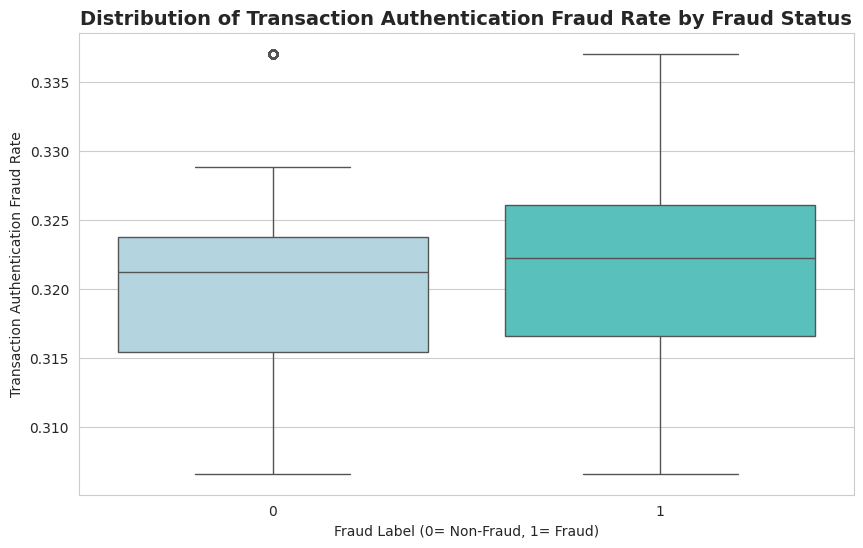

In [ ]:
#create boxplot for transaction_auth_fraud_rate
plt.figure(figsize=(10, 6))
# Changed the keys in the palette dictionary from integers to strings
sns.boxplot(x='fraud_label', y='transaction_auth_fraud_rate', data=df, showfliers=True, palette={'0': 'lightblue', '1': 'mediumturquoise'})
plt.title('Distribution of Transaction Authentication Fraud Rate by Fraud Status', fontsize=14, fontweight='bold')
plt.xlabel('Fraud Label (0= Non-Fraud, 1= Fraud)')
plt.ylabel('Transaction Authentication Fraud Rate')
plt.show()

In [ ]:
# Risk Binning: Low (0–0.4), Medium (0.4–0.8), High (0.8–1.0)
df['risk_score_bin'] = pd.cut(
    df['risk_score'],
    bins=[-0.00001, 0.4, 0.8,1],
    labels=[0, 1, 2],
    include_lowest=True
)
# Ubah label jadi integer
df['risk_score_bin'] = df['risk_score_bin'].astype(int)

In [ ]:
# Display the unique values and their counts in the 'risk_score_band' column
print(df['risk_score_bin'].value_counts())

# Display the first 20 rows of the 'risk_score_band' column
print(df['risk_score_bin'].head(20))

risk_score_bin
1    20043
0    19887
2    10070
Name: count, dtype: int64
0     2
1     0
2     2
3     1
4     0
5     0
6     0
7     1
8     0
9     0
10    1
11    1
12    1
13    0
14    0
15    0
16    0
17    0
18    1
19    0
Name: risk_score_bin, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       50000 non-null  object        
 1   transaction_amount            50000 non-null  float64       
 2   transaction_type              50000 non-null  object        
 3   timestamp                     50000 non-null  datetime64[ns]
 4   account_balance               50000 non-null  float64       
 5   device_type                   50000 non-null  object        
 6   location                      50000 non-null  object        
 7   merchant_category             50000 non-null  object        
 8   ip_address_flag               50000 non-null  int64         
 9   previous_fraudulent_activity  50000 non-null  int64         
 10  daily_transaction_count       50000 non-null  int64         
 11  avg_transaction_amount_7d   

telah ditambahkan 4 kolom untuk memperkaya data

In [ ]:
# Calculate the total transactions per month
total_transactions_per_month = df.groupby('transaction_month').size().rename('total_transactions')

# Calculate the transactions per month per fraud label
transactions_per_month_fraud = df.groupby(['fraud_label', 'transaction_month']).size().rename('fraud_transactions')

# Combine the two Series into a DataFrame
combined_counts = pd.merge(
    transactions_per_month_fraud,
    total_transactions_per_month,
    left_on='transaction_month',
    right_index=True,
    how='left'
)

# Calculate the percentage
combined_counts['percentage'] = (combined_counts['fraud_transactions'] / combined_counts['total_transactions'])

# Reset the index to make 'fraud_label' and 'transaction_month' columns
percentage_per_month = combined_counts.reset_index()

# Optional: Filter for fraud_label = 1 if you only want the fraud percentages
# percentage_per_month = percentage_per_month[percentage_per_month['fraud_label'] == 1]

print(percentage_per_month)

    fraud_label  transaction_month  fraud_transactions  total_transactions  \
0             0                  1                2802                4188   
1             0                  2                2657                3903   
2             0                  3                2899                4259   
3             0                  4                2796                4106   
4             0                  5                2847                4162   
5             0                  6                2813                4160   
6             0                  7                2859                4213   
7             0                  8                2950                4384   
8             0                  9                2812                4087   
9             0                 10                2821                4164   
10            0                 11                2784                4085   
11            0                 12                2893          

In [ ]:
!pip install ace_tools

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu
# Try importing ace_tools first
try:
    import ace_tools as tools
    print("ace_tools imported successfully.")
except ImportError:
    print("ace_tools not found. Attempting installation...")
    # If import fails, try installing
    !pip install ace_tools

    # After attempting installation, try importing again
    try:
        import ace_tools as tools
        print("ace_tools installed and imported successfully.")
    except ImportError:
        print("ace_tools still not found after installation attempt.")
        # Fallback: Define a placeholder for tools.display_dataframe_to_user
        # This allows the rest of the code to run, displaying the dataframe using pandas
        class MockAceTools:
            def display_dataframe_to_user(self, name, dataframe):
                print(f"\n--- {name} ---")
                display(dataframe) # Use IPython.display.display

        tools = MockAceTools()
        print("Using fallback display method as ace_tools could not be imported.")


# Pisahkan data berdasarkan label fraud
# Assuming 'df' is available from previous cells
# You might need to re-run cells that define 'df' if you restarted the kernel
if 'df' not in globals():
    print("DataFrame 'df' not found. Please run the cells that load and prepare the data.")
else:
    fraud = df[df['fraud_label'] == 1]
    non_fraud = df[df['fraud_label'] == 0]

    # Kolom numerik utama untuk uji statistik
    columns_to_test = [
        'transaction_amount',
        'risk_score',
        'transaction_distance',
        'failed_transaction_count_7d',
        'account_balance',
        'avg_transaction_amount_7d',
        'card_age',
        'daily_transaction_count',
        'transaction_auth_fraud_rate'
    ]

    # Fungsi uji statistik per kolom
    def run_statistical_tests(col):
        fraud_data = fraud[col].dropna()
        non_fraud_data = non_fraud[col].dropna()

        t_stat, t_pval = ttest_ind(fraud_data, non_fraud_data, equal_var=False)
        u_stat, u_pval = mannwhitneyu(fraud_data, non_fraud_data, alternative='two-sided')

        return {
            'Feature': col,
            'T-Test p-value': t_pval,
            'Mann-Whitney U p-value': u_pval,
            'Fraud Mean': np.mean(fraud_data),
            'Non-Fraud Mean': np.mean(non_fraud_data),
            'Fraud Median': np.median(fraud_data),
            'Non-Fraud Median': np.median(non_fraud_data)
        }

    # Jalankan semua uji
    results = pd.DataFrame([run_statistical_tests(col) for col in columns_to_test])

    # Tampilkan hasil using the potentially mocked tools object
    tools.display_dataframe_to_user(name="Fraud Statistical Comparison", dataframe=results)

ace_tools not found. Attempting installation...
ace_tools still not found after installation attempt.
Using fallback display method as ace_tools could not be imported.

--- Fraud Statistical Comparison ---


,Feature,T-Test p-value,Mann-Whitney U p-value,Fraud Mean,Non-Fraud Mean,Fraud Median,Non-Fraud Median
0,transaction_amount,0.671543,0.826717,99.683678,99.281907,70.120000,69.400000
1,risk_score,0.000000,0.000000,0.662904,0.425158,0.806900,0.426300
2,transaction_distance,0.979451,0.977164,2498.922109,2499.278762,2496.660000,2487.680000
3,failed_transaction_count_7d,0.000000,0.000000,3.051472,1.507353,4.000000,2.000000
4,account_balance,0.481191,0.480643,50162.264626,50356.472852,50415.020000,50370.350000
5,avg_transaction_amount_7d,0.874869,0.874797,255.416370,255.203530,256.210000,256.050000
6,card_age,0.485136,0.485154,119.687123,120.148056,119.000000,120.000000
7,daily_transaction_count,0.114117,0.113302,7.443767,7.504877,7.000000,7.000000
8,transaction_auth_fraud_rate,0.001301,0.002402,0.321480,0.321273,0.322276,0.321276


## Drop Unnecessary columns
setelah melakukan inisiasi eda beberapa kolom akan dihapus karena:
1. unique identifier -> user_id' tidak memberikan dampak dalam konteks prediksi
2. sudah dikembangkan menjadi fitur baru -> 'timestamp'


In [ ]:
# make a df copy
dfbackup2_timestamp = df.copy()

In [ ]:
# Dropping unnecessary columns
df = df.drop(columns = ['timestamp'], axis = 1)

In [ ]:
# make a df copy
dfbackup2 = df.copy()

In [ ]:
# Dropping unnecessary columns dan posibility untuk data leakage
cols_to_drop = ['user_id']
df = df.drop(cols_to_drop, axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   transaction_amount            50000 non-null  float64
 1   transaction_type              50000 non-null  object 
 2   account_balance               50000 non-null  float64
 3   device_type                   50000 non-null  object 
 4   location                      50000 non-null  object 
 5   merchant_category             50000 non-null  object 
 6   ip_address_flag               50000 non-null  int64  
 7   previous_fraudulent_activity  50000 non-null  int64  
 8   daily_transaction_count       50000 non-null  int64  
 9   avg_transaction_amount_7d     50000 non-null  float64
 10  failed_transaction_count_7d   50000 non-null  int64  
 11  card_type                     50000 non-null  object 
 12  card_age                      50000 non-null  int64  
 13  t

## Encoding categorical variables

mengubah data kategori menjadi numeric dengan mengurai misalnya ada 3 kategori card_type: mastedcard, discover, amex nanti akan di pecah menjadi 3 kolom card_type_mastercard dst kolomnya berisi 1 dan 0 (binomial) jd apabila ada baris yang berisi nilai 1 berarti dia card_type = mastercard, nilai 0 berarti berisi card_type lainnya

In [ ]:
# exclude all numerical columns so we only see the non-numeric one
df_non_numeric = df.select_dtypes(exclude='number')

In [ ]:
# get the columns
non_numerical_column = df_non_numeric.columns
print(non_numerical_column)

Index(['transaction_type', 'device_type', 'location', 'merchant_category',
       'card_type', 'authentication_method'],
      dtype='object')


In [ ]:
# apply hot encoding for nominal feature minus card_age
df_encoded = pd.get_dummies(
    df,
    columns=['transaction_type', 'device_type', 'location', 'merchant_category',
       'card_type', 'authentication_method'],
    dtype=int,
    drop_first=True
)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   transaction_amount              50000 non-null  float64
 1   account_balance                 50000 non-null  float64
 2   ip_address_flag                 50000 non-null  int64  
 3   previous_fraudulent_activity    50000 non-null  int64  
 4   daily_transaction_count         50000 non-null  int64  
 5   avg_transaction_amount_7d       50000 non-null  float64
 6   failed_transaction_count_7d     50000 non-null  int64  
 7   card_age                        50000 non-null  int64  
 8   transaction_distance            50000 non-null  float64
 9   risk_score                      50000 non-null  float64
 10  is_weekend                      50000 non-null  int64  
 11  fraud_label                     50000 non-null  int64  
 12  transaction_min                 

In [ ]:
backup3 = df_encoded.copy()

telah dilakukan one hot encoding untuk data kategorikal, kemudian akan dilakukan korelasi check sebelum split data

## Correlation Chek before Split Data

In [ ]:
#correlation check
df_encoded.corr()

,transaction_amount,account_balance,ip_address_flag,previous_fraudulent_activity,daily_transaction_count,avg_transaction_amount_7d,failed_transaction_count_7d,card_age,transaction_distance,risk_score,...,merchant_category_Electronics,merchant_category_Groceries,merchant_category_Restaurants,merchant_category_Travel,card_type_Discover,card_type_Mastercard,card_type_Visa,authentication_method_OTP,authentication_method_PIN,authentication_method_Password
transaction_amount,1.000000,-0.002380,-0.001620,0.001668,0.002149,-6.254920e-03,0.001247,0.002294,0.007935,0.005606,...,-0.005869,-0.002211,0.005111,-0.000649,-0.000900,-0.001095,-5.000733e-03,0.002950,0.002860,-0.005842
account_balance,-0.002380,1.000000,-0.001210,-0.002314,0.006041,-1.737875e-03,-0.000186,0.000717,0.001748,-0.005262,...,0.006572,-0.008979,0.002725,0.001683,0.001490,0.000653,7.071459e-03,-0.007139,0.008330,0.001897
ip_address_flag,-0.001620,-0.001210,1.000000,-0.008298,0.001815,-4.844582e-03,0.010370,-0.003143,-0.003941,-0.004064,...,-0.000422,-0.002049,0.000276,0.000514,0.000454,-0.003407,8.339393e-03,-0.001862,-0.000595,0.002257
previous_fraudulent_activity,0.001668,-0.002314,-0.008298,1.000000,0.000492,1.599670e-03,-0.000352,-0.006713,0.005740,-0.002815,...,-0.003828,0.007738,-0.002123,-0.001254,0.003727,-0.003547,-7.416595e-03,0.005943,-0.000072,-0.001517
daily_transaction_count,0.002149,0.006041,0.001815,0.000492,1.000000,4.881830e-03,-0.007820,-0.001516,-0.001842,-0.007572,...,0.000093,0.001773,-0.007220,0.000152,0.004227,-0.003995,-7.198850e-03,-0.001428,-0.004577,0.003083
avg_transaction_amount_7d,-0.006255,-0.001738,-0.004845,0.001600,0.004882,1.000000e+00,0.006583,-0.008735,-0.003066,0.004977,...,-0.006526,0.004987,-0.004839,0.000018,-0.000716,-0.000106,7.337356e-07,0.010175,-0.006312,-0.001948
failed_transaction_count_7d,0.001247,-0.000186,0.010370,-0.000352,-0.007820,6.583271e-03,1.000000,-0.004570,-0.006997,0.000814,...,0.000062,0.000513,0.000130,0.003058,0.002374,-0.002792,2.136973e-03,0.004465,-0.003277,0.002286
card_age,0.002294,0.000717,-0.003143,-0.006713,-0.001516,-8.734693e-03,-0.004570,1.000000,-0.003339,-0.001385,...,-0.002164,0.003270,0.000743,0.002040,-0.000243,-0.001642,2.417691e-03,0.005930,-0.003533,0.000775
transaction_distance,0.007935,0.001748,-0.003941,0.005740,-0.001842,-3.066398e-03,-0.006997,-0.003339,1.000000,-0.001902,...,0.005417,-0.005778,-0.002590,0.002131,0.000429,-0.006663,1.212322e-03,0.006498,-0.009099,0.005734
risk_score,0.005606,-0.005262,-0.004064,-0.002815,-0.007572,4.976605e-03,0.000814,-0.001385,-0.001902,1.000000,...,0.001442,0.003612,-0.000689,-0.002600,0.002184,-0.004100,-8.019241e-03,0.002086,-0.008799,0.006682


In [ ]:
#group by transaction month dan agg avg transaction amount
df.groupby(['fraud_label','transaction_month'])['transaction_amount'].mean().reset_index(name= 'avg transaction amount')

,fraud_label,transaction_month,avg transaction amount
0,0,1,101.001345
1,0,2,97.241065
2,0,3,101.969055
3,0,4,99.941048
4,0,5,97.668247
5,0,6,99.008415
6,0,7,100.620374
7,0,8,100.423386
8,0,9,98.729374
9,0,10,97.854871


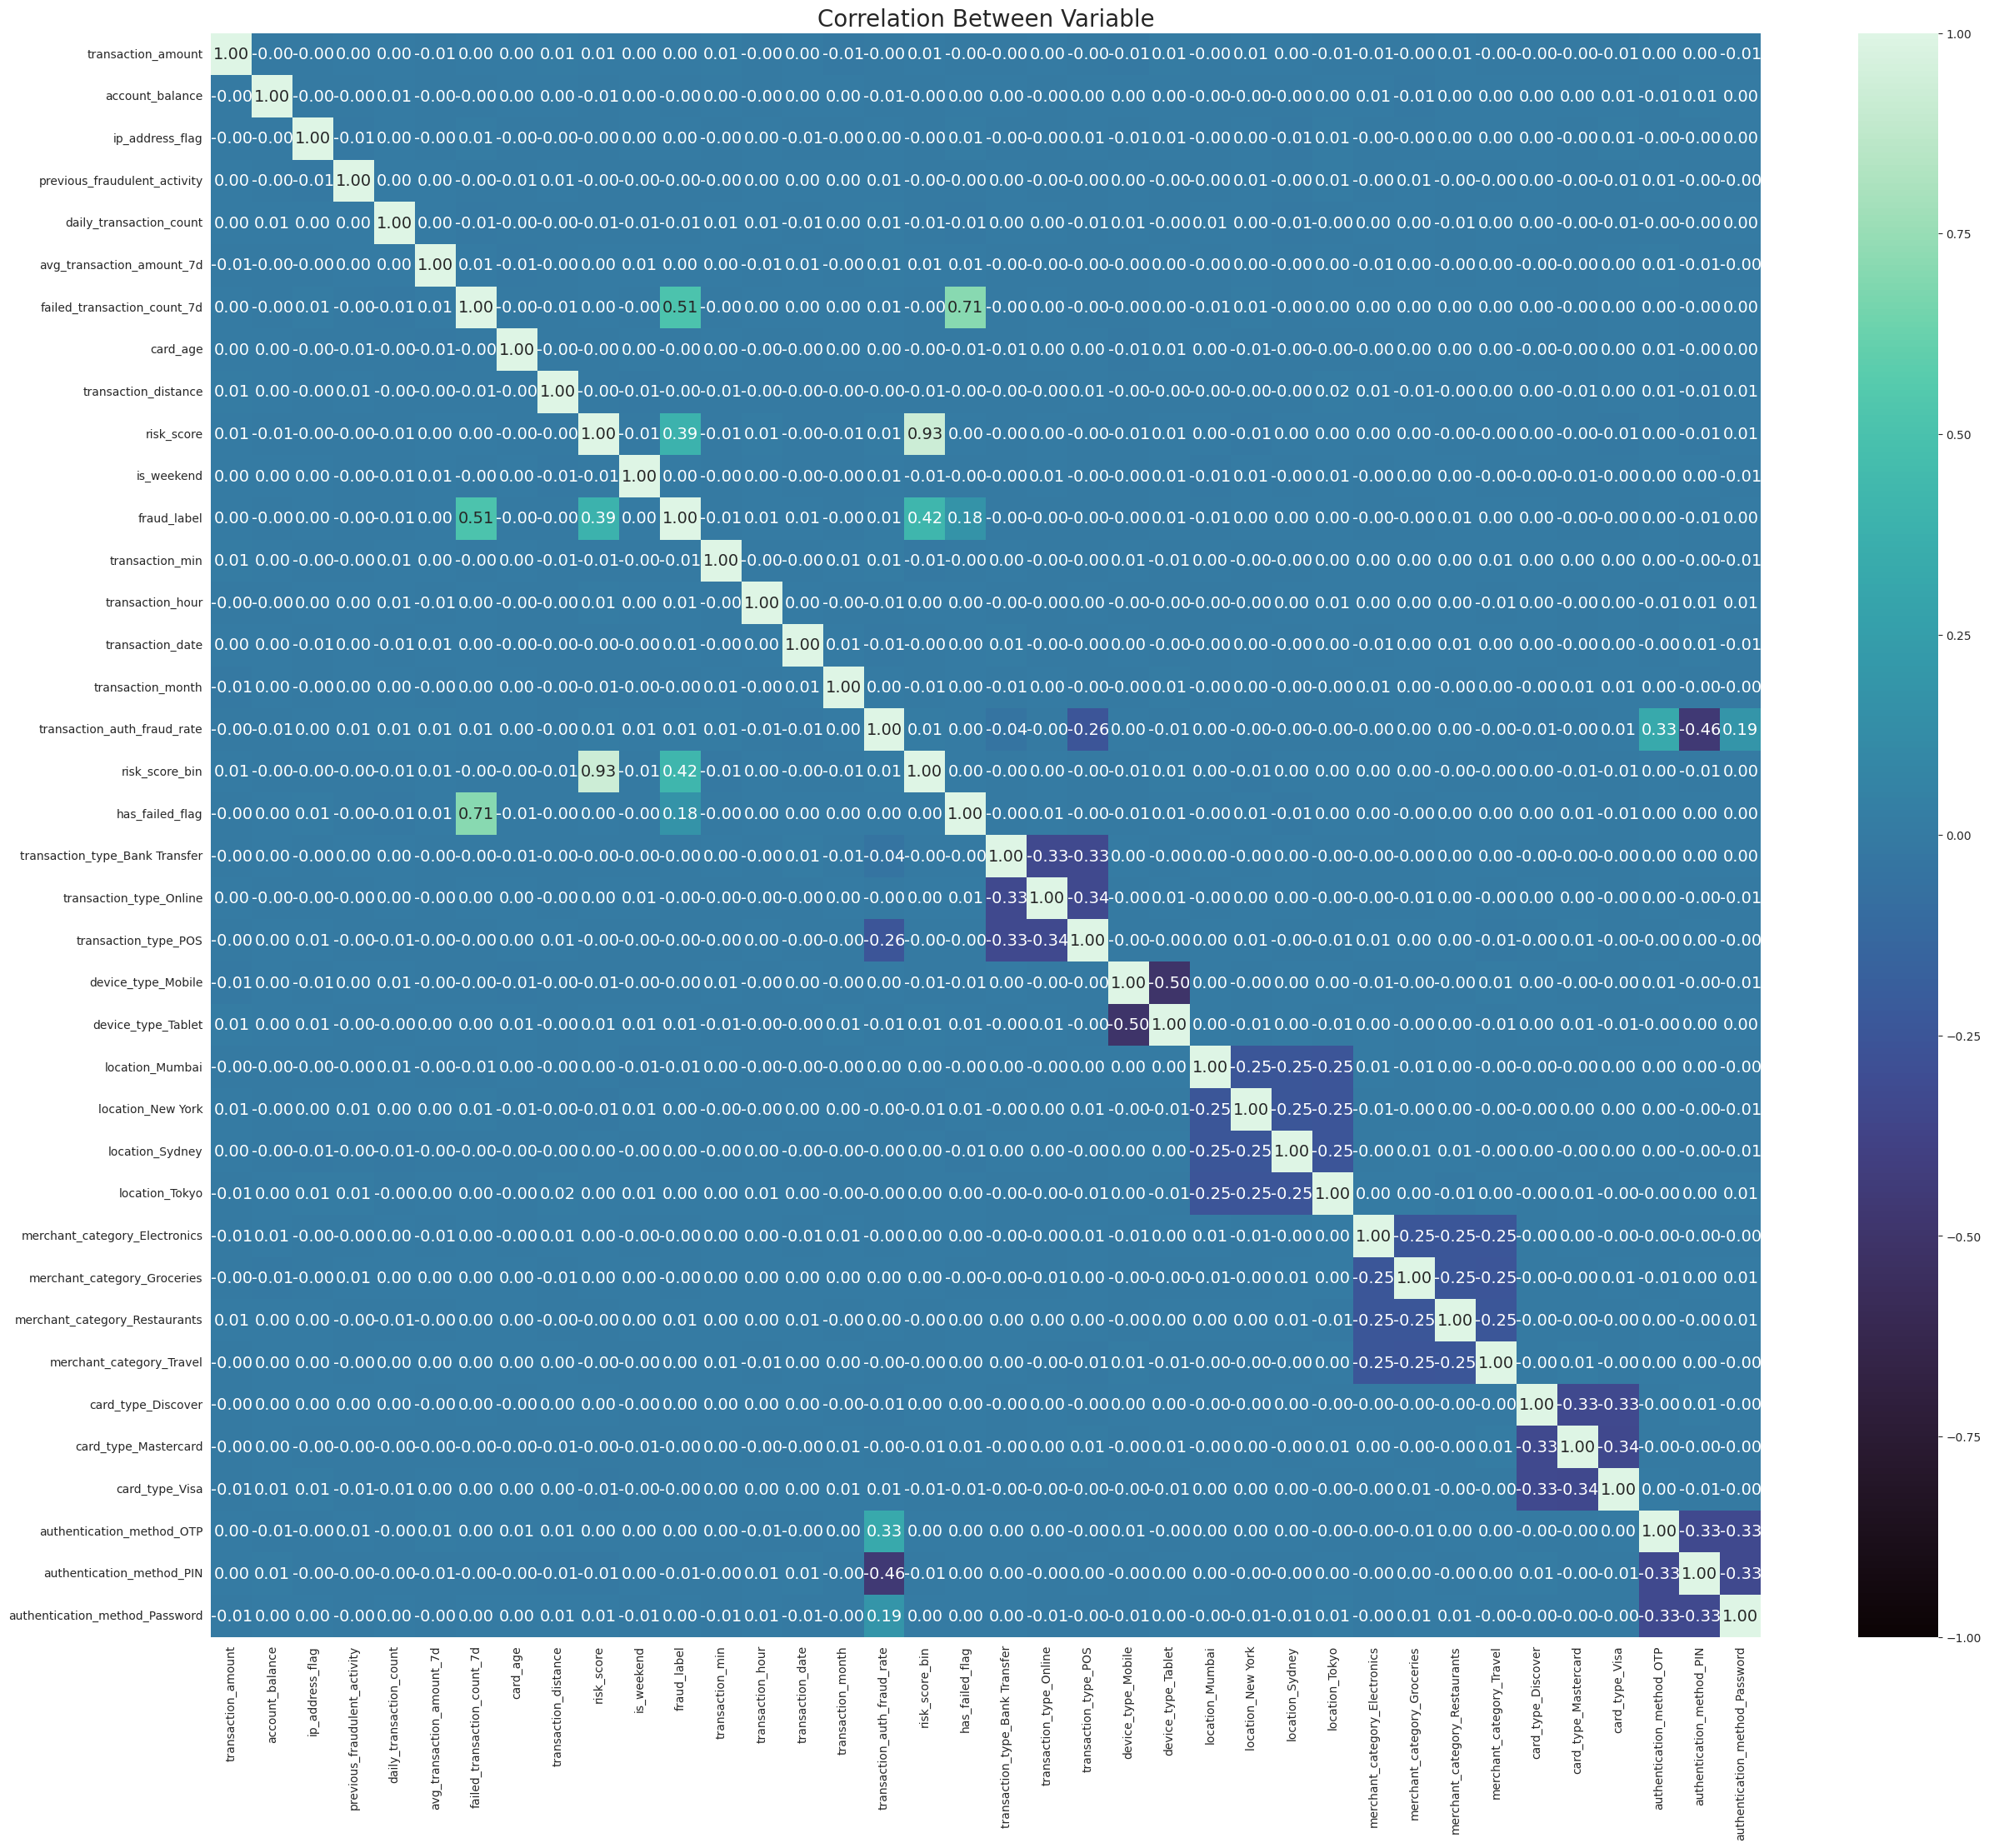

In [ ]:
#correlation check after feature engineering and shows in heatmap

plt.subplots(figsize=(30,25))

plt.title('Correlation Between Variable', fontsize = 20)
#create heatmap
sns.heatmap(
    df_encoded.corr(), #correlation data put in heatmap
    vmin=-1, #min value for heatmap color
    vmax=1, #max value for heatmap color
    cmap='mako', #color palette
    annot=True, #show label in the heatmap
    annot_kws={"fontsize":14}, #fontsize of label
    fmt=",.2f" #text format in label (,.2f = show 2 decimals)
);

korelasi with target feature:
-moderate positive: failed_transaction_count_7d vs fraud_label (0.51), risk_score vs fraud_label (0.39)

multikolinearitas potential
- device_type_mobile vs device_type_tablet (-0.5) dll karena mereka merupakan hasil transaformasi data menggunakan encoding, dan tidak akan kita takeout
- risk_score vs risk_score_bin (0.93), untuk itu kita akan pisah menjadi 2 model, 1 dengan risk_score, 1 dengan risk_score bin




In [ ]:
#save the df_encoded into csv file

df_encoded.to_csv('df_encoded.csv', index=False)


karena sepertinya ada bocoran jawaban berlebihan dari failed transaction count_7d dan risk score maka kita akan cek mutual info score untuk memastikan

## Calculate mutual info score

In [ ]:
#calculate mutual info score
import pandas as pd
from sklearn.feature_selection import mutual_info_classif


# split fitur and target
X_encoded = df_encoded.drop(columns=["fraud_label"])
y_enconded = df_encoded["fraud_label"]

# calculate mutual information
mi_scores = mutual_info_classif(X_encoded, y_enconded, random_state=42)

# save score in df
mi_df = pd.DataFrame({
    "feature": X_encoded.columns,
    "mutual_info_score": mi_scores
}).sort_values(by="mutual_info_score", ascending=False)


In [ ]:
mi_df

,feature,mutual_info_score
6,failed_transaction_count_7d,0.285699
9,risk_score,0.203169
16,risk_score_bin,0.130143
17,has_failed_flag,0.022020
10,is_weekend,0.004306
32,card_type_Mastercard,0.003629
2,ip_address_flag,0.003540
35,authentication_method_PIN,0.003128
22,device_type_Tablet,0.003124
4,daily_transaction_count,0.003124


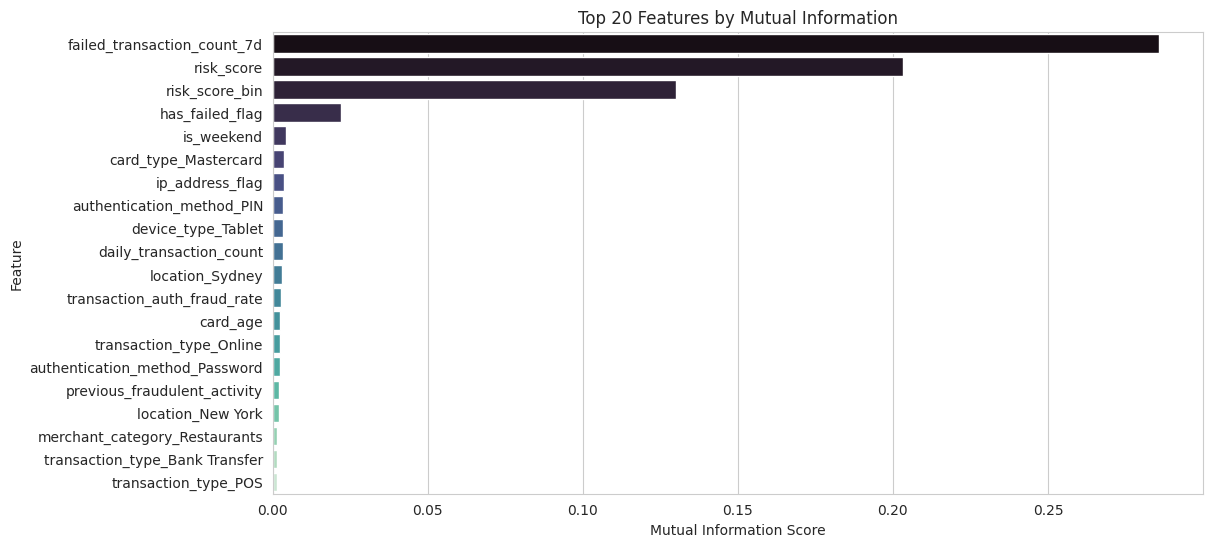

In [ ]:
# shows top 20 mi
top_mi_df = mi_df.head(20).reset_index(drop=True)

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x="mutual_info_score", y="feature", data=top_mi_df, palette="mako")  # palette can be changed to your liking
plt.title("Top 20 Features by Mutual Information")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")  # Add y-axis label

plt.show()  # Display the plot only once

terlalu dominan failed transaction_count_7d jd model belajar terlalu banyak

kita akan bekerja dengan df_encoded saat ini dan akan membuat model:
1. model 1 menggunakan risk_score
2. model 2 menggunakan risk_score_bin


## buat 2 versi df encoded

In [ ]:
#creates df1 and df2
df1 = df_encoded.drop(columns=['risk_score_bin']) # Model 1 use risk_score
df2 = df_encoded.drop(columns=['risk_score']) # Model 2 use risk_score_bin

# MODELING


In [ ]:
#create model pipeline
def train_evaluate_plot_light(df_encoded_all, model_name):
    print(f"=== Training {model_name} ===")

    # Start timing
    start_time = time.time()

    # 1. Split X and y
    X = df_encoded_all.drop(columns=['fraud_label'])
    y = df_encoded_all['fraud_label']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )

    # 2. Define pipeline
    pipeline = Pipeline(steps=[
        ('smote', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

    # 3. Parameter grid (light)
    param_grid = {
        'classifier__n_estimators': [100],  # fix 100 pohon
        'classifier__max_depth': [10, 20],  # lebih dangkal
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2],
        'classifier__class_weight': ['balanced']
    }
    #using randomized cross validation
    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_grid,
        n_iter=5,  # lebih ringan
        scoring='f1',
        cv=3,
        verbose=1,
        random_state=42,
        n_jobs=-1
    )

    # 5. Fit model
    search.fit(X_train, y_train)

    # 6. Predict and evaluate
    y_train_pred = search.predict(X_train)
    y_pred = search.predict(X_test)
    y_prob = search.predict_proba(X_test)[:, 1]

    print("\nBest Parameters:", search.best_params_)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # 7. Confusion Matrix Plot
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted 0", "Predicted 1"],
                yticklabels=["Actual 0", "Actual 1"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # 8. Add ROC Curve Plot for Test Set
    fpr, tpr, thresholds = roc_curve(y_pred, y_prob)
    roc_auc = roc_auc_score(y_pred, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random') # Add random line
    plt.title(f"ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # 9. Feature Importance Plot
    model_rf = search.best_estimator_.named_steps['classifier']
    importances = model_rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    features = X.columns[indices]
    importance_scores = importances[indices]

    plt.figure(figsize=(12, 6))
    plt.title(f"Top 20 Feature Importances - {model_name}")
    plt.bar(range(20), importance_scores[:20], align="center")
    plt.xticks(range(20), features[:20], rotation=90)
    plt.tight_layout()
    plt.show()

    # Stop timing
    end_time = time.time()
    elapsed_minutes = (end_time - start_time) / 60
    print(f"=== Done {model_name} in {elapsed_minutes:.2f} minutes ===\n\n")

    return search.best_estimator_, X_test, y_test


=== Training Model 1 - Risk Score ===
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best Parameters: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 10, 'classifier__class_weight': 'balanced'}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10180
           1       1.00      1.00      1.00      4820

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

ROC AUC Score: 1.0000


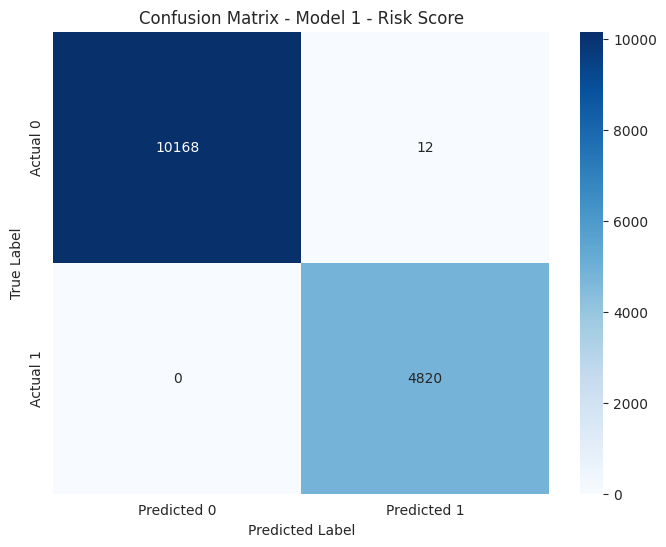

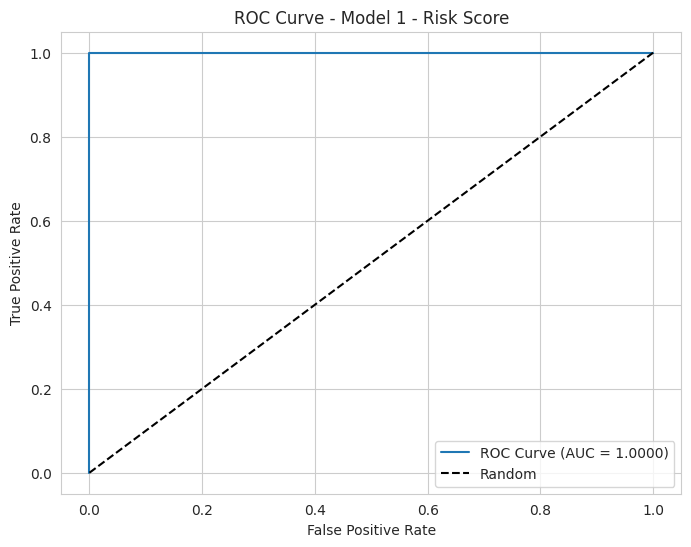

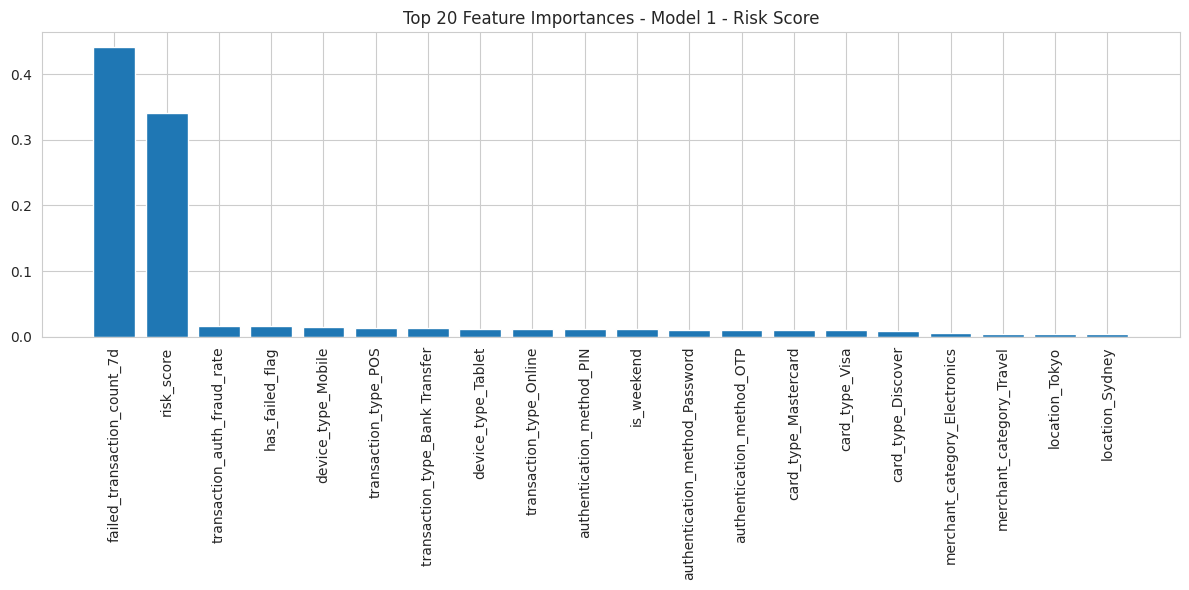

=== Done Model 1 - Risk Score in 1.48 minutes ===




In [ ]:
model1, X_test1, y_test1 = train_evaluate_plot_light(df1, "Model 1 - Risk Score")

=== Training Model 2 - Risk Score Bin ===
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best Parameters: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 20, 'classifier__class_weight': 'balanced'}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     10180
           1       0.89      1.00      0.94      4820

    accuracy                           0.96     15000
   macro avg       0.94      0.97      0.96     15000
weighted avg       0.96      0.96      0.96     15000

ROC AUC Score: 0.9886


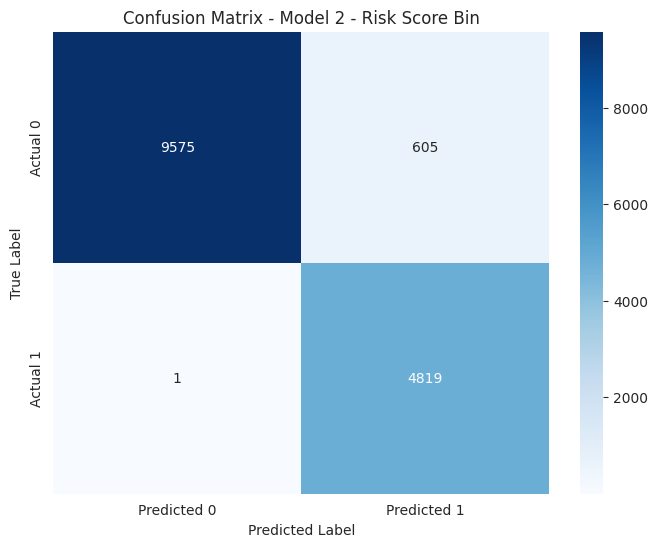

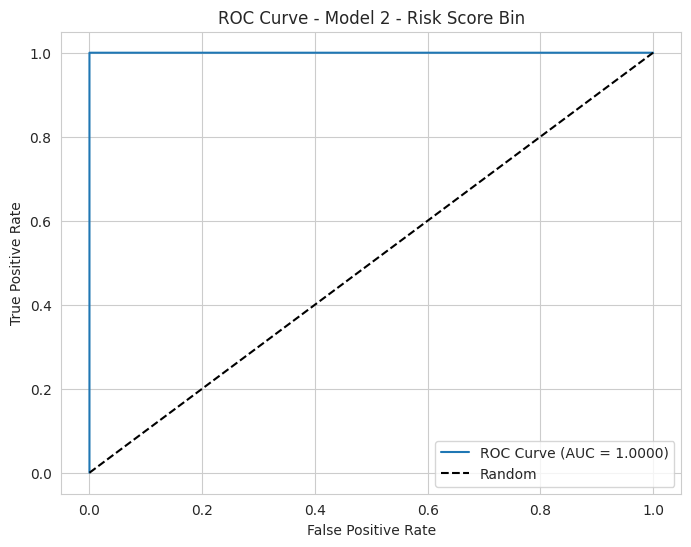

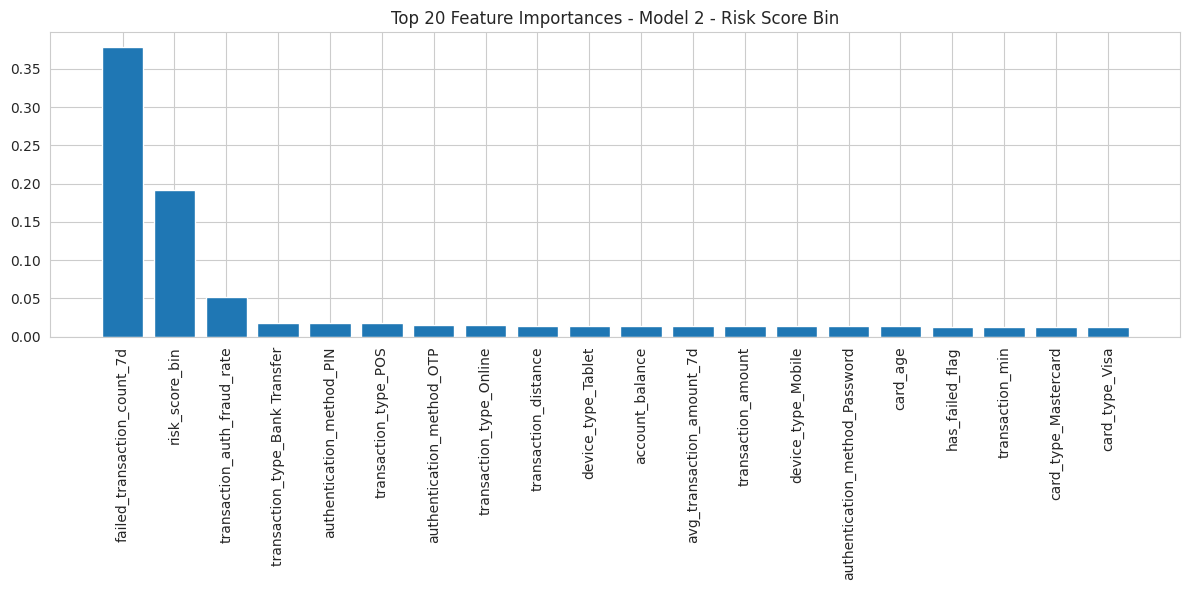

=== Done Model 2 - Risk Score Bin in 1.61 minutes ===




In [ ]:
model2, X_test2, y_test2 = train_evaluate_plot_light(df2, "Model 2 - Risk Score Bin")

model yang dipilih yang kedua karena Model ini lebih realistis dan robust untuk implementasi tahap produksi.

In [ ]:
#download to csv dfbackup2

dfbackup2.to_csv('fraud_data_clean.csv', index=False)


# MODEL PREDICT

In [ ]:
# predict in data test
y_pred2 = model2.predict(X_test2)
y_prob2 = model2.predict_proba(X_test2)[:, 1]  # Probabilitas score prediksi fraud

In [ ]:
# 2. data prediction
df_prediction = pd.DataFrame({
    'prediction': y_pred2,
    'probability': y_prob2,
    'true_label': y_test2.values
}, index=X_test2.index)

# 3. Subset from data original (just index X_test2)
df_raw_subset = dfbackup2_timestamp.loc[X_test2.index].reset_index(drop=True)

# 4. merge raw data + prediction result
df_dashboard_final = pd.concat([df_raw_subset, df_prediction.reset_index(drop=True)], axis=1)


In [ ]:
df_dashboard_final

,user_id,transaction_amount,transaction_type,timestamp,account_balance,device_type,location,merchant_category,ip_address_flag,previous_fraudulent_activity,...,fraud_label,transaction_min,transaction_hour,transaction_date,transaction_month,transaction_auth_fraud_rate,risk_score_bin,prediction,probability,true_label
0,USER_7333,124.74,Bank Transfer,2023-05-21 14:40:00,61520.85,Tablet,Mumbai,Travel,1,0,...,0,40,14,21,5,0.326868,0,0,0.045365,0
1,USER_7524,197.81,Bank Transfer,2023-01-07 23:32:00,48989.06,Laptop,Mumbai,Clothing,0,0,...,0,32,23,7,1,0.315399,0,0,0.131571,0
2,USER_4124,28.33,POS,2023-06-23 07:15:00,87099.91,Tablet,New York,Clothing,0,0,...,0,15,7,23,6,0.321216,2,1,0.673093,0
3,USER_2236,217.92,Online,2023-10-02 02:52:00,80724.13,Tablet,Tokyo,Restaurants,0,0,...,0,52,2,2,10,0.326094,0,0,0.039167,0
4,USER_7919,39.92,Bank Transfer,2023-11-19 09:38:00,80757.77,Tablet,Tokyo,Restaurants,0,0,...,1,38,9,19,11,0.321276,0,1,0.930000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,USER_6172,208.17,Bank Transfer,2023-12-14 11:46:00,85447.46,Mobile,New York,Restaurants,0,0,...,0,46,11,14,12,0.319734,0,0,0.050044,0
14996,USER_2356,122.19,Online,2023-01-02 13:58:00,26816.34,Laptop,Mumbai,Electronics,0,0,...,0,58,13,2,1,0.323795,0,0,0.186739,0
14997,USER_2753,56.33,Online,2023-07-27 15:39:00,43876.57,Tablet,London,Groceries,0,0,...,0,39,15,27,7,0.328857,0,0,0.076450,0
14998,USER_3895,117.68,ATM Withdrawal,2023-09-28 19:56:00,88378.25,Tablet,London,Restaurants,0,0,...,0,56,19,28,9,0.316591,1,0,0.306111,0


In [ ]:
df_dashboard_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       15000 non-null  object        
 1   transaction_amount            15000 non-null  float64       
 2   transaction_type              15000 non-null  object        
 3   timestamp                     15000 non-null  datetime64[ns]
 4   account_balance               15000 non-null  float64       
 5   device_type                   15000 non-null  object        
 6   location                      15000 non-null  object        
 7   merchant_category             15000 non-null  object        
 8   ip_address_flag               15000 non-null  int64         
 9   previous_fraudulent_activity  15000 non-null  int64         
 10  daily_transaction_count       15000 non-null  int64         
 11  avg_transaction_amount_7d   

In [ ]:
df_dashboard_final.to_csv('dashboard_final_dataset.csv', index=False)